In [1]:
##### Import packages
# Basic packages
import pandas as pd
import numpy as np

# Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import FeatureGroup, LayerControl, Map

# Other packages
import time
from datetime import datetime
import json
import geopandas as gpd

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
##### Functions

# Create labels on charts
def autolabel(plot):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')  
# Plot a bar chart        
def graph_bar(data,title):        
    plt.figure(figsize=(35, 10))
    plot = sns.barplot(x = data.index, y = data.values, palette="rocket")
    plt.title(title)
    plt.xticks(rotation=90)
    autolabel(plot)
    plt.tight_layout()
    plt.show()

# Plot a pie chart    
def graph_pie(dictionary,title):
    dictionary = dict(sorted(dictionary.items(), key = lambda item: item[1], reverse=True))
    plt.figure(figsize=(10, 10))
    plt.pie(dictionary.values(), labels = dictionary.keys(), explode = [0.1 for i in range(len(dictionary.values()))],
            autopct='%.1f%%', shadow = True, labeldistance = 1.07, startangle = 45)
    plt.title(title)
    centre_circle = plt.Circle((0,0),0.80,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Initial analysis

In [3]:
##### Import data
# Check the csv's path before running it

df_est = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1") # Mexican states data
df_cov = pd.read_csv("14.11.20 - COVID19MEXICO.csv", encoding = "ISO-8859-1") # Covid-19 data

In [4]:
##### Brief statistic of each DataFrame

# Mexican states data
print(' Mexican states data '.center(35,'#'))
df_est.info()
df_est.describe()
print(' ')

# Covid-19 data
print(' Covid-19 data '.center(35,'#'))
df_cov.info()
df_cov.describe()

####### Mexican states data #######
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Clave Estado  36 non-null     int64 
 1   Estado        36 non-null     object
 2   Latitud       36 non-null     object
 3   Longitud      36 non-null     object
 4   Error         36 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB
 
########## Covid-19 data ##########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604659 entries, 0 to 2604658
Data columns (total 38 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   FECHA_ACTUALIZACION  object
 1   ID_REGISTRO          object
 2   ORIGEN               int64 
 3   SECTOR               int64 
 4   ENTIDAD_UM           int64 
 5   SEXO                 int64 
 6   ENTIDAD_NAC          int64 
 7   ENTIDAD_RES          int64 
 8   MUNICIPIO_RES        int64 
 9  

ORIGEN        SECTOR    ENTIDAD_UM          SEXO   ENTIDAD_NAC  \
count  2.604659e+06  2.604659e+06  2.604659e+06  2.604659e+06  2.604659e+06   
mean   1.653697e+00  9.305706e+00  1.497912e+01  1.485867e+00  1.593824e+01   
std    4.757912e-01  3.632421e+00  8.130242e+00  4.998003e-01  9.908850e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  9.000000e+00  1.000000e+00  9.000000e+00   
50%    2.000000e+00  1.200000e+01  1.400000e+01  1.000000e+00  1.500000e+01   
75%    2.000000e+00  1.200000e+01  2.100000e+01  2.000000e+00  2.200000e+01   
max    2.000000e+00  9.900000e+01  3.200000e+01  2.000000e+00  9.900000e+01   

        ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE      INTUBADO      NEUMONIA  \
count  2.604659e+06   2.604659e+06   2.604659e+06  2.604659e+06  2.604659e+06   
mean   1.521911e+01   3.572881e+01   1.152521e+00  8.273965e+01  2.574456e+00   
std    8.069411e+00   4.663257e+01   3.595252e-01  3.396808e+01  8.118889e+00   
min    1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
25%    9.000000e+00   7.000000e+00   1.000000e+00  9.700000e+01  2.000000e+00   
50%    1.400000e+01   2.000000e+01   1.000000e+00  9.700000e+01  2.000000e+00   
75%    2.100000e+01   4.300000e+01   1.000000e+00  9.700000e+01  2.000000e+00   
max    3.200000e+01   9.990000e+02   2.000000e+00  9.900000e+01  9.900000e+01   

       ...  CARDIOVASCULAR      OBESIDAD  RENAL_CRONICA    TABAQUISMO  \
count  ...    2.604659e+06  2.604659e+06   2.604659e+06  2.604659e+06   
mean   ...    2.275956e+00  2.140302e+00   2.272887e+00  2.224780e+00   
std    ...    5.301842e+00  5.230812e+00   5.261679e+00  5.427951e+00   
min    ...    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
25%    ...    2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
50%    ...    2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
75%    ...    2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
max    ...    9.800000e+01  9.800000e+01   9.800000e+01  9.800000e+01   

          OTRO_CASO  TOMA_MUESTRA  RESULTADO_LAB  CLASIFICACION_FINAL  \
count  2.604659e+06  2.604659e+06   2.604659e+06         2.604659e+06   
mean   1.239754e+01  1.083095e+00   9.638235e+00         5.268265e+00   
std    3.073970e+01  2.760257e-01   2.630911e+01         1.899884e+00   
min    1.000000e+00  1.000000e+00   1.000000e+00         1.000000e+00   
25%    1.000000e+00  1.000000e+00   1.000000e+00         3.000000e+00   
50%    2.000000e+00  1.000000e+00   2.000000e+00         6.000000e+00   
75%    2.000000e+00  1.000000e+00   2.000000e+00         7.000000e+00   
max    9.900000e+01  2.000000e+00   9.700000e+01         7.000000e+00   

           MIGRANTE           UCI  
count  2.604659e+06  2.604659e+06  
mean   9.860378e+01  8.276828e+01  
std    6.195444e+00  3.392957e+01  
min    1.000000e+00  1.000000e+00  
25%    9.900000e+01  9.700000e+01  
50%    9.900000e+01  9.700000e+01  
75%    9.900000e+01  9.700000e+01  
max    9.900000e+01  9.900000e+01  

[8 rows x 31 columns]

In [5]:
##### Number of missing values for each DataFrame

for dataframe,name in zip([df_est,df_cov],['Mexican states data','Covid-19 data']):
    print(f' {name}  nº of NaNs: '.center(55,'#'))
    if dataframe.isna().sum().sum() == 0:
        print('0 NaNs in total dataset')
    else:
        for column in dataframe.columns:
            if dataframe[column].isna().sum() != 0:
                print(f'{column} has {round(dataframe[column].isna().sum()/dataframe.shape[0],3)}% of NaNs')

########### Mexican states data  nº of NaNs: ##########
0 NaNs in total dataset
############## Covid-19 data  nº of NaNs: #############
0 NaNs in total dataset


# Exploratory Data Analysis

In [6]:
##### Transform all the mexican states from number to name

states_num = sorted(df_cov['ENTIDAD_RES'].unique())
states_name = df_est['Estado'].loc[:31].values

dict_states = dict()
for num,name in zip(states_num,states_name):
    dict_states[num] = name
print(dict_states)

df_cov['ENTIDAD_RES'] = df_cov['ENTIDAD_RES'].map(dict_states)

{1: 'Aguascalientes', 2: 'Baja California', 3: 'Baja California Sur', 4: 'Campeche', 5: 'Coahuila De Zaragoza', 6: 'Colima', 7: 'Chiapas', 8: 'Chihuahua', 9: 'Ciudad De México', 10: 'Durango', 11: 'Guanajuato', 12: 'Guerrero', 13: 'Hidalgo', 14: 'Jalisco', 15: 'Estado De México', 16: 'Michoacán De Ocampo', 17: 'Morelos', 18: 'Nayarit', 19: 'Nuevo León', 20: 'Oaxaca', 21: 'Puebla', 22: 'Querétaro', 23: 'Quintana Roo', 24: 'San Luis Potosí', 25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco', 28: 'Tamaulipas', 29: 'Tlaxcala', 30: 'Veracruz De Ignacio De La Llave', 31: 'Yucatán', 32: 'Zacatecas'}


In [7]:
##### Transform all the mexican National Health System institutions from number to name

dict_sector = {1:'CRUZ ROJA', 2:'DIF',3:'ESTATAL',4:'IMSS',5:'IMSS-BIENESTAR',6:'ISSSTE',7:'MUNICIPAL',8:'PEMEX',
               9:'PRIVADA',10:'SEDENA',11:'SEMAR',12:'SSA',13:'UNIVERSITARIO',99:'NO ESPECIFICADO'}

df_cov['SECTOR'] = df_cov['SECTOR'].map(dict_sector)

In [8]:
##### Create a new colum with the time difference between been positive in COVID-19 and die
# If the person didn't die, time difference is 0

df_cov['FECHA_SINTOMAS'] = df_cov['FECHA_SINTOMAS'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_cov['FECHA_DEF'] = df_cov['FECHA_DEF'].replace('9999-99-99', '2001-01-01')

df_cov['FECHA_DEF'] = df_cov['FECHA_DEF'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_cov['DIFERENCIA'] = df_cov['FECHA_DEF'].sub(df_cov['FECHA_SINTOMAS'], axis=0)

df_cov['DIFERENCIA'] = df_cov['DIFERENCIA'] / np.timedelta64(1, 'D')
df_cov.loc[df_cov['DIFERENCIA']<0,'DIFERENCIA'] = 0

## Positive COVID-19 cases

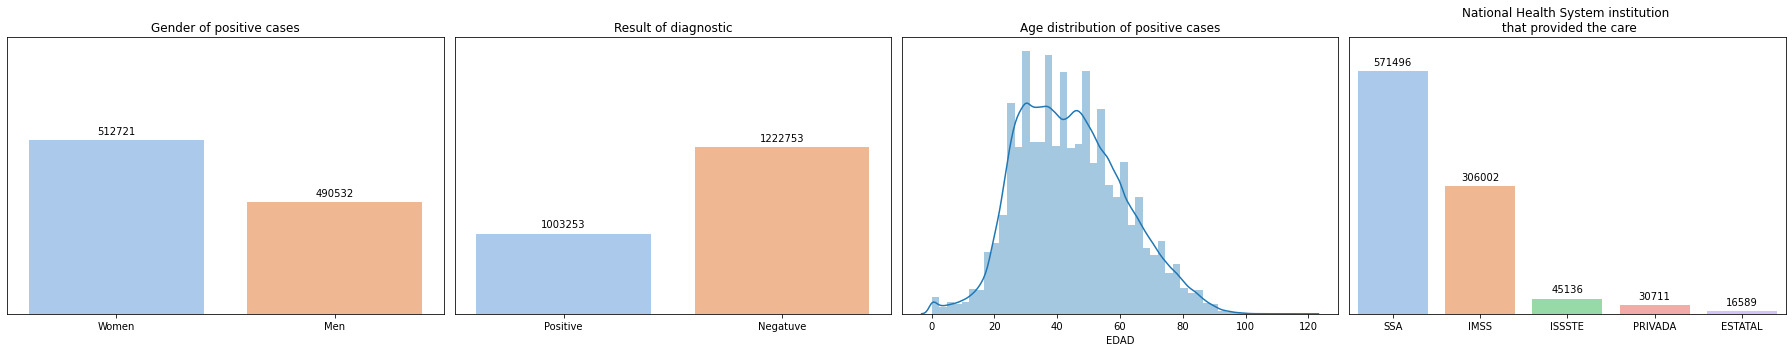

In [9]:
##### Analysis of total number of positive cases
# Catalogo and Descriptores show all the information about the variables. 
# CLASIFICACION_FINAL has 1, 2 or 3 when a person is COVID-19 confirmed.

df_positive_cases =  df_cov[df_cov['CLASIFICACION_FINAL'].isin([1,2,3])]

fig, axes = plt.subplots(1, 4, figsize=(25, 5))

# 1st graph - Gender of positive cases
axes[0].set_title('Gender of positive cases')
plot = sns.barplot(x = ['Women','Men'],y = df_positive_cases['SEXO'].value_counts().values, palette = 'pastel', ax = axes[0])
plot.set(ylim = (450000,550000), ylabel = None, yticklabels = [])
plot.tick_params(left=False)
autolabel(plot)

# 2nd graph - Result of diagnostic (positive or not)
axes[1].set_title('Result of diagnostic')
pos, neg = [df_positive_cases.shape[0], df_cov.query('CLASIFICACION_FINAL == 7').shape[0]]
plot = sns.barplot(x = ['Positive','Negatuve'],y = [pos,neg], palette = 'pastel', ax = axes[1])
plot.set(ylim = (800000,1500000), ylabel = None, yticklabels = [])
plot.tick_params(left=False)
autolabel(plot)

# 3rd graph - Age distribution of positives cases
axes[2].set_title('Age distribution of positive cases')
plot = sns.distplot(df_positive_cases.EDAD, ax = axes[2])
plot.set(ylabel = None, yticklabels = [])
plot.tick_params(left=False)

# 4th graph - National Health System institution that provided the care
axes[3].set_title('National Health System institution \n that provided the care')
data = df_positive_cases.SECTOR.value_counts()
plot = sns.barplot(x = data.index[:5], y = data.values[:5],
                   palette = 'pastel', ax = axes[3])
plot.set(ylim = (10000,650000), ylabel = None, yticklabels = [])
plot.tick_params(left=False)
autolabel(plot)

plt.tight_layout()
plt.show()

################## Total number of positive cases = 1003253 | % of total = 0.385% ##################


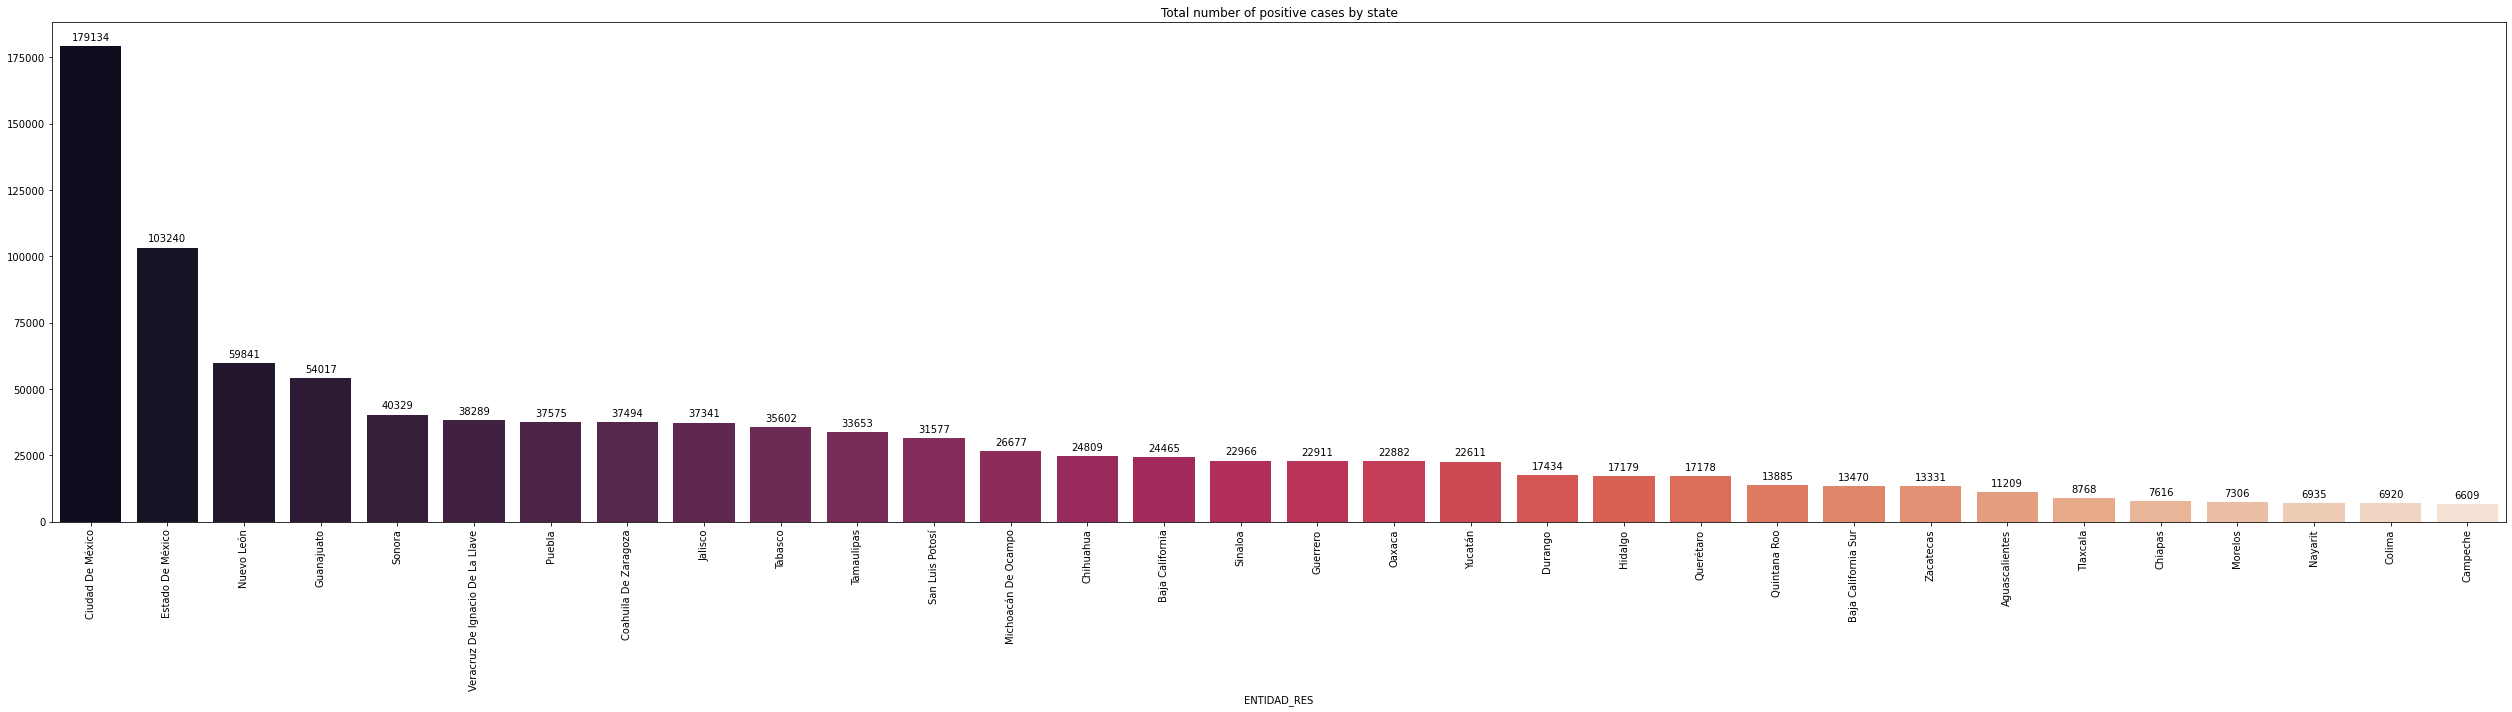

In [10]:
##### Total number of positive cases by state

# Data Extraction
print(f' Total number of positive cases = {df_positive_cases.shape[0]} | % of total = {(df_positive_cases.shape[0]/df_cov.shape[0]):.3}% '.center(100,'#'))
data = df_positive_cases.groupby('ENTIDAD_RES').count()['CLASIFICACION_FINAL'].sort_values(ascending = False)

# Data Visualization
graph_bar(data, 'Total number of positive cases by state')

############################# Total mean age of positive cases = 44.3 ##############################


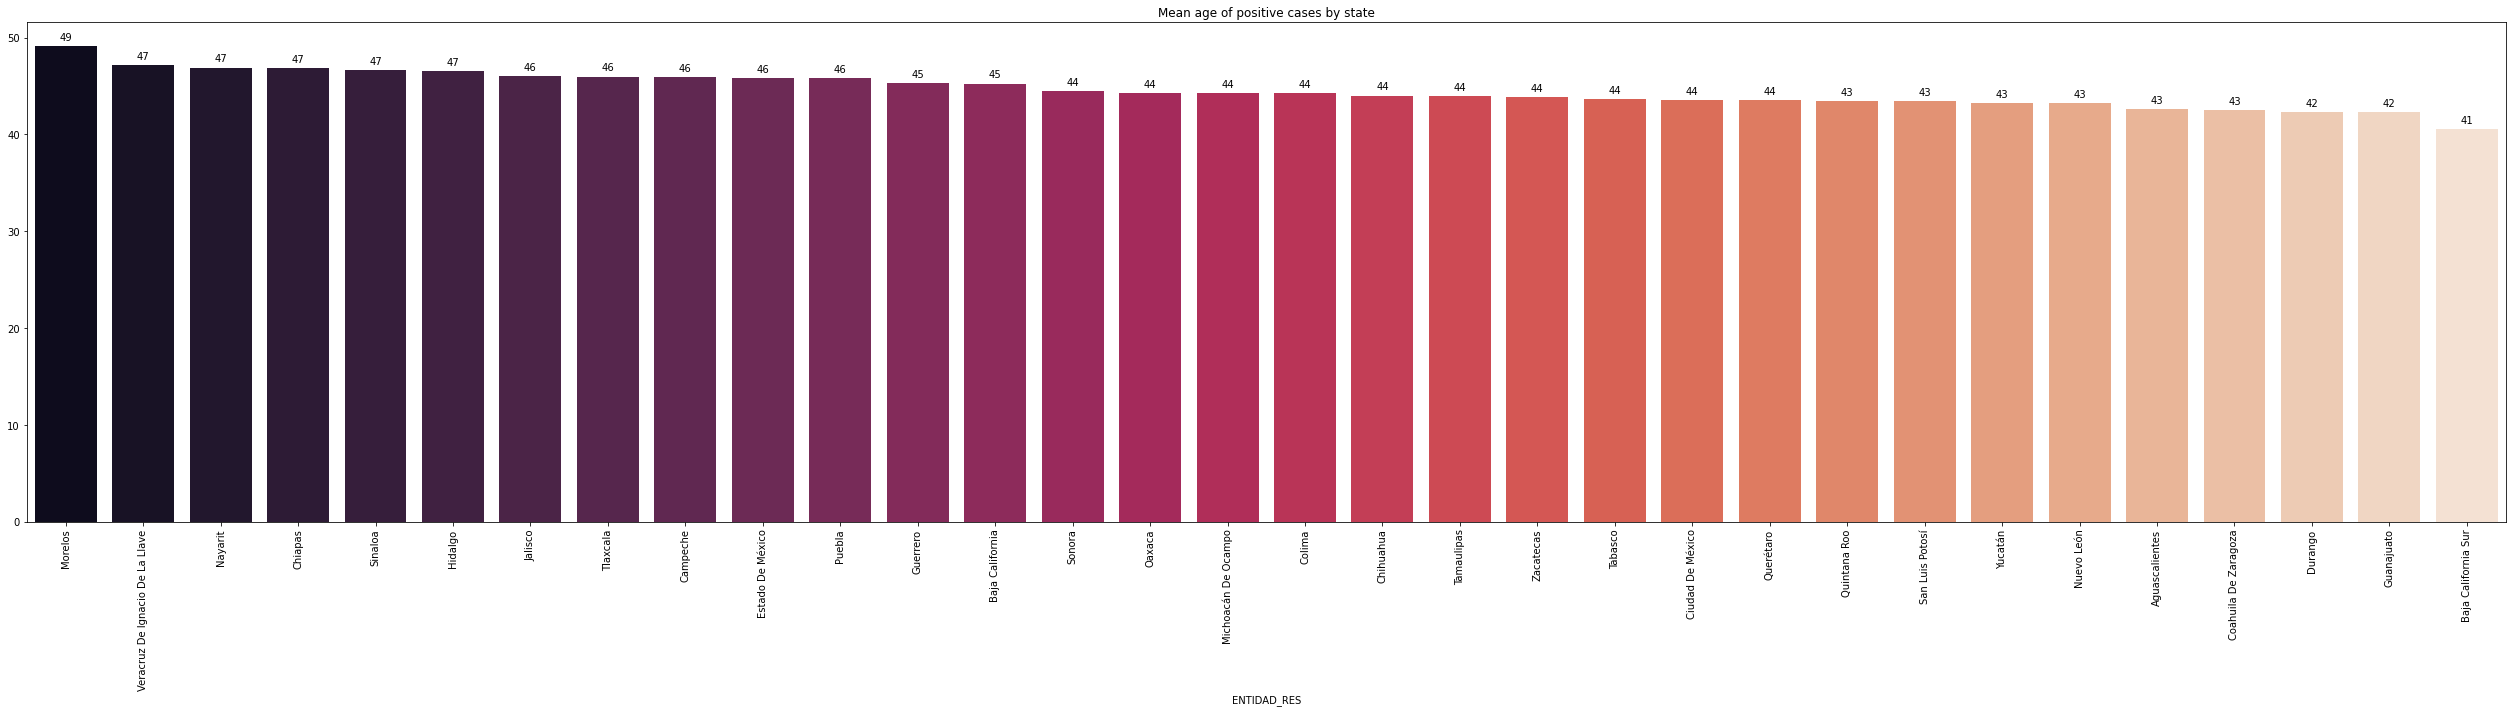

In [11]:
##### Mean age of positive cases by state

# Data Extraction
print(f' Total mean age of positive cases = {(df_positive_cases.EDAD.mean()):.3} '.center(100,'#'))
data = df_positive_cases.groupby('ENTIDAD_RES').mean()['EDAD'].sort_values(ascending = False)

# Data Visualization
graph_bar(data, 'Mean age of positive cases by state')

################### Most common illness on total positive cases  = HIPERTENSION ####################


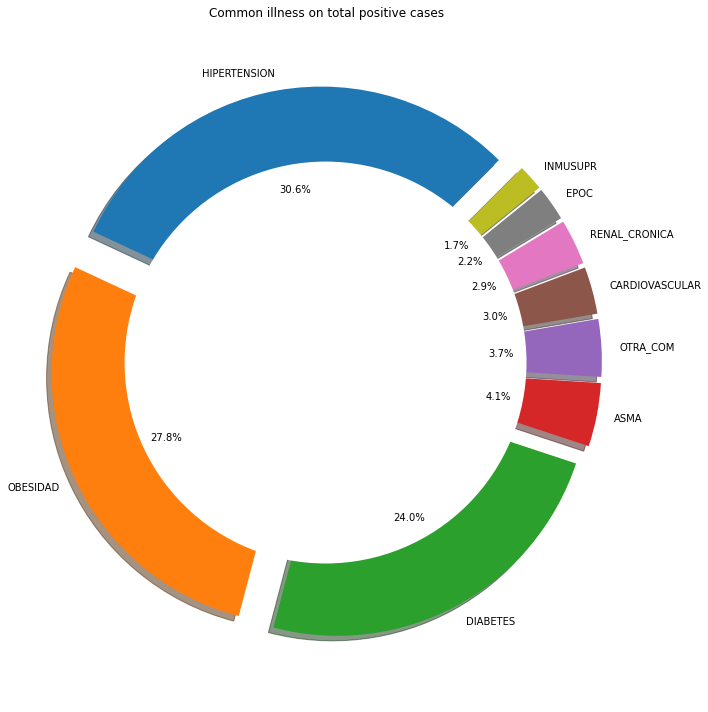

In [12]:
##### Common illness on total positive cases 

# Data Extraction
ill_name = ['DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA']
dict_ill_pos = dict()
for name in ill_name:
    dict_ill_pos[name] = df_positive_cases.query(f'{name} == 1').shape[0]
print(f' Most common illness on total positive cases  = {max(dict_ill_pos, key=dict_ill_pos.get)} '.center(100,'#'))

# Data Visualization
graph_pie(dict_ill_pos,'Common illness on total positive cases')

########################################## Aguascalientes ##########################################
Most common illness on total positive cases at Aguascalientes = HIPERTENSION


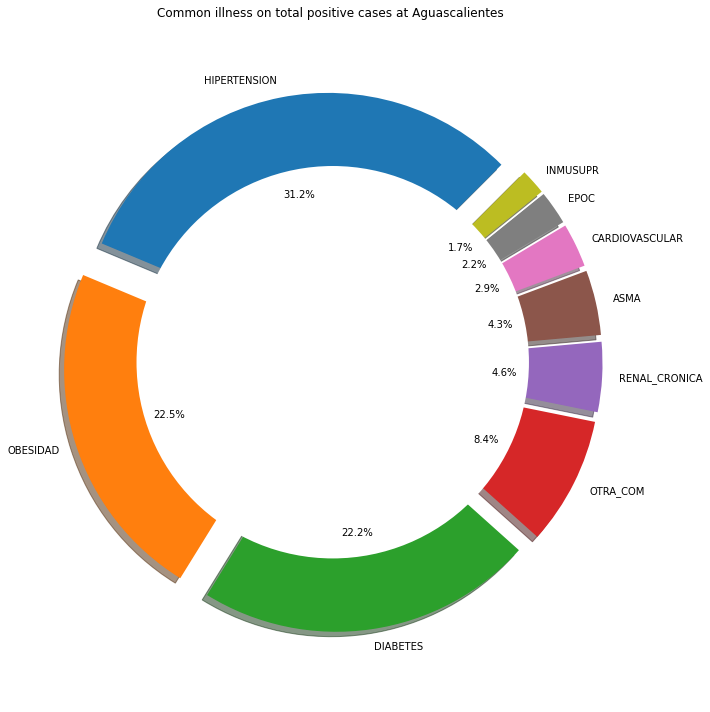

######################################### Baja California ##########################################
Most common illness on total positive cases at Baja California = HIPERTENSION


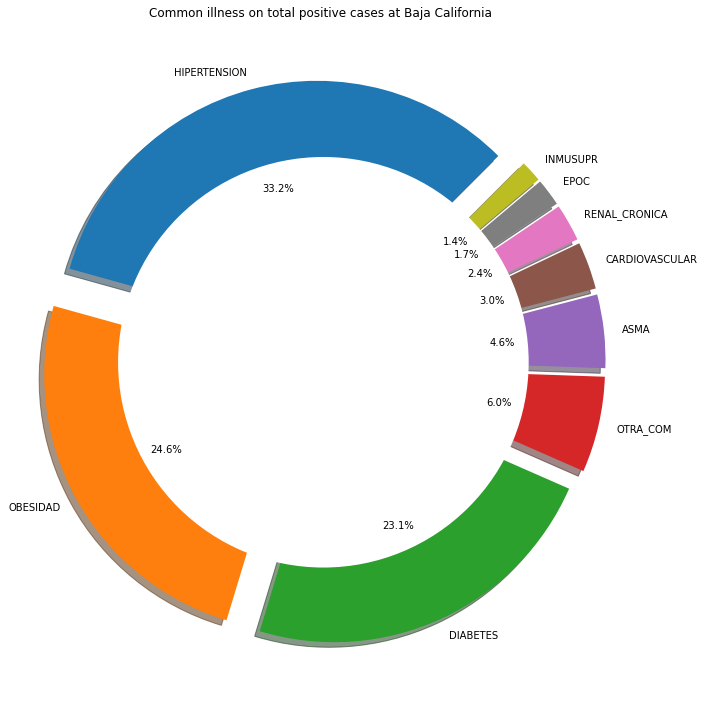

####################################### Baja California Sur ########################################
Most common illness on total positive cases at Baja California Sur = OBESIDAD


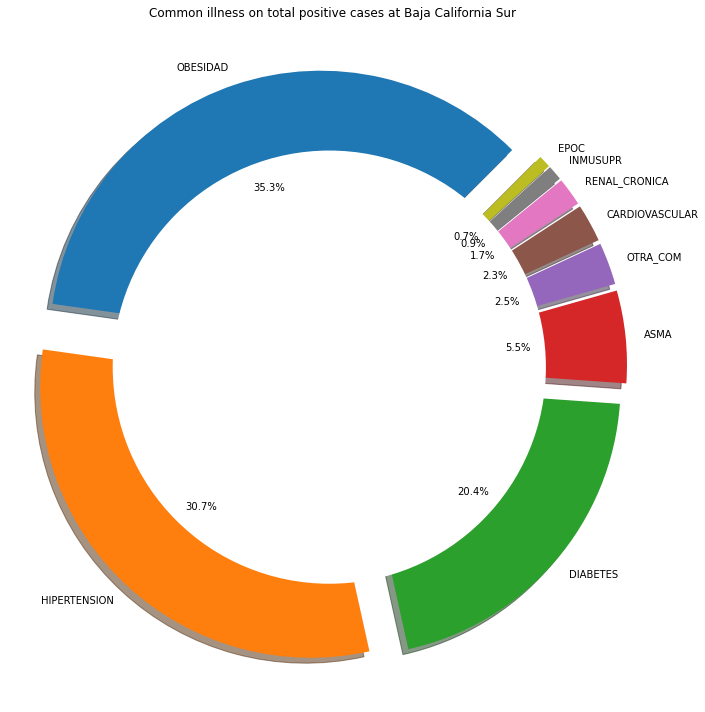

############################################# Campeche #############################################
Most common illness on total positive cases at Campeche = OBESIDAD


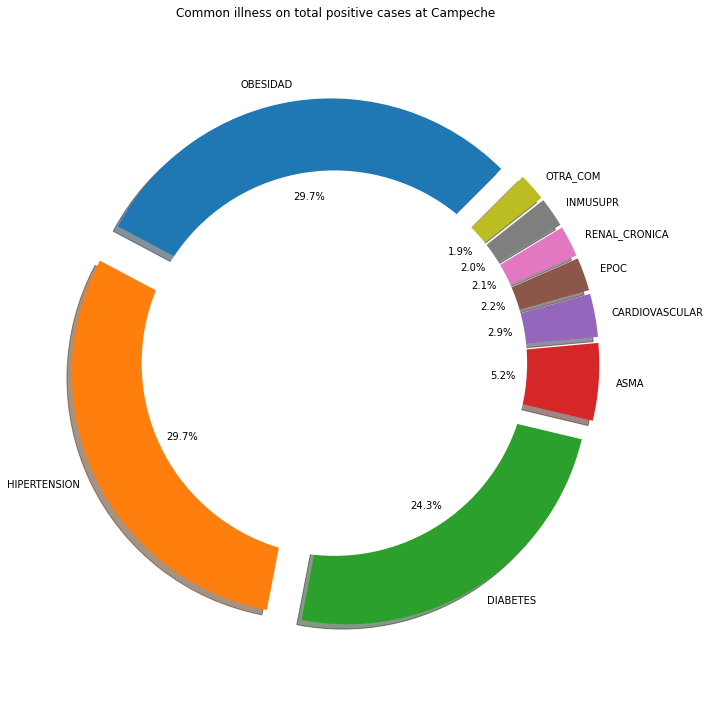

############################################# Chiapas ##############################################
Most common illness on total positive cases at Chiapas = HIPERTENSION


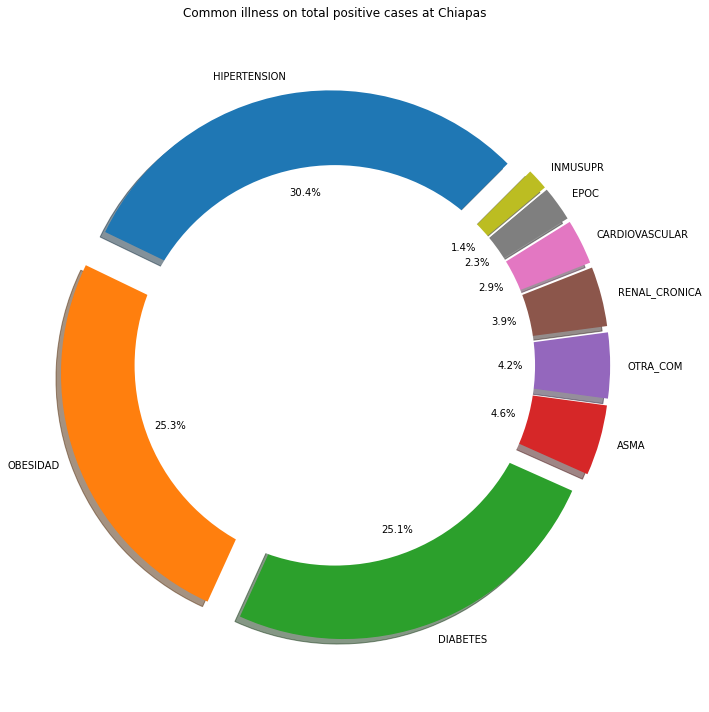

############################################ Chihuahua #############################################
Most common illness on total positive cases at Chihuahua = HIPERTENSION


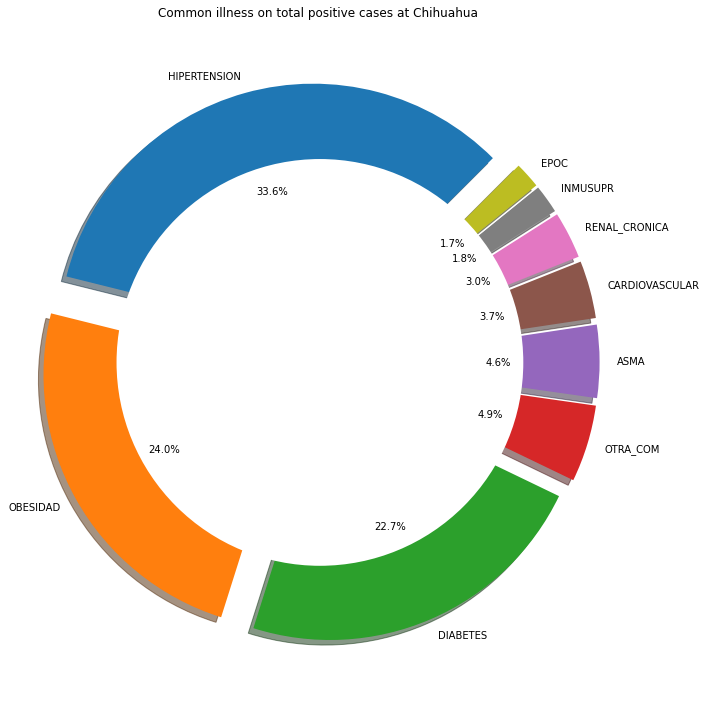

######################################### Ciudad De México #########################################
Most common illness on total positive cases at Ciudad De México = OBESIDAD


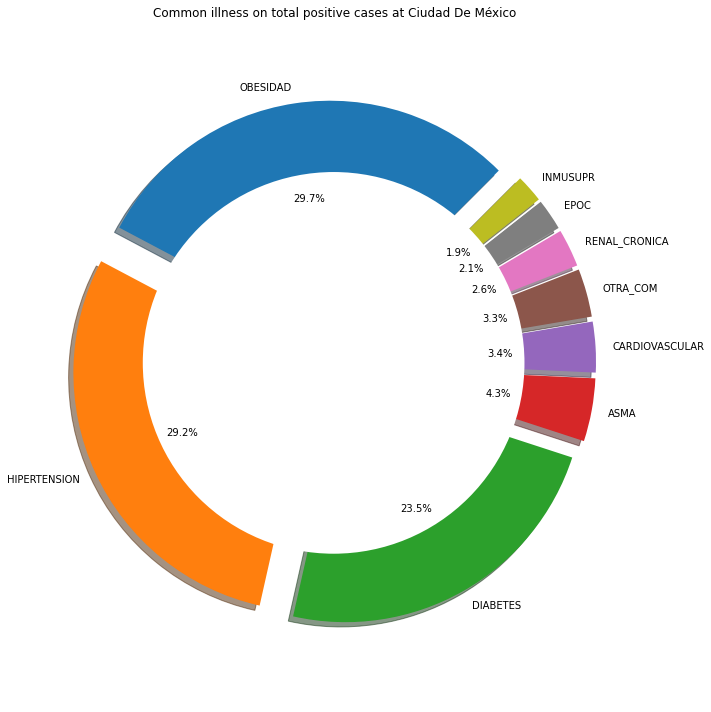

####################################### Coahuila De Zaragoza #######################################
Most common illness on total positive cases at Coahuila De Zaragoza = HIPERTENSION


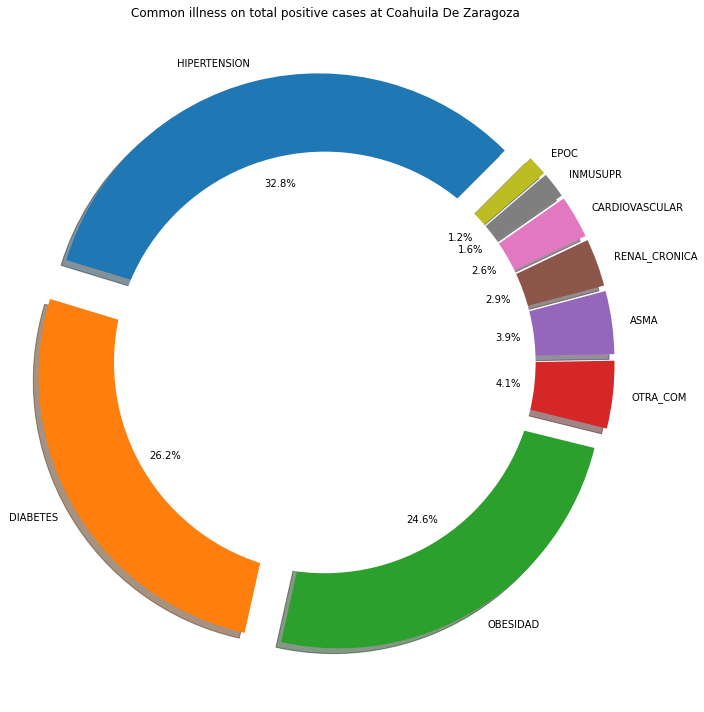

############################################## Colima ##############################################
Most common illness on total positive cases at Colima = OBESIDAD


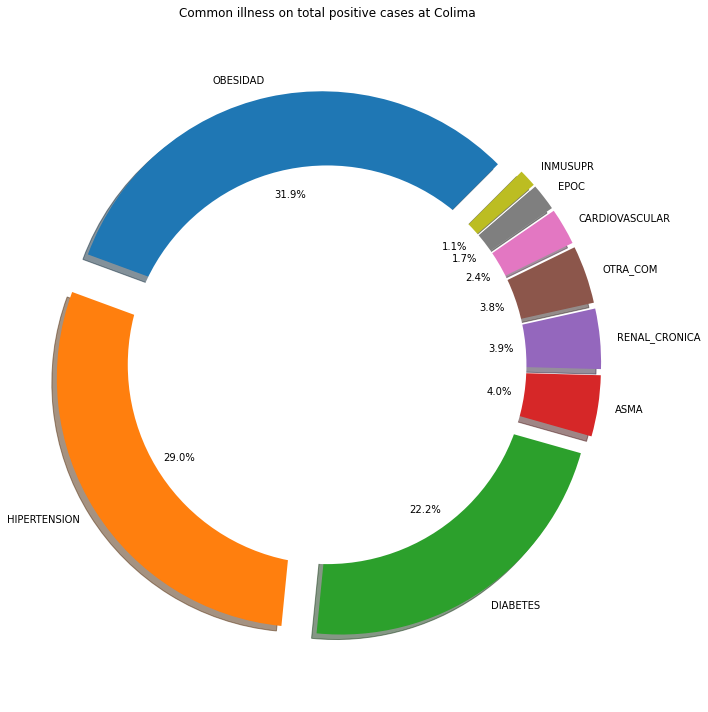

############################################# Durango ##############################################
Most common illness on total positive cases at Durango = HIPERTENSION


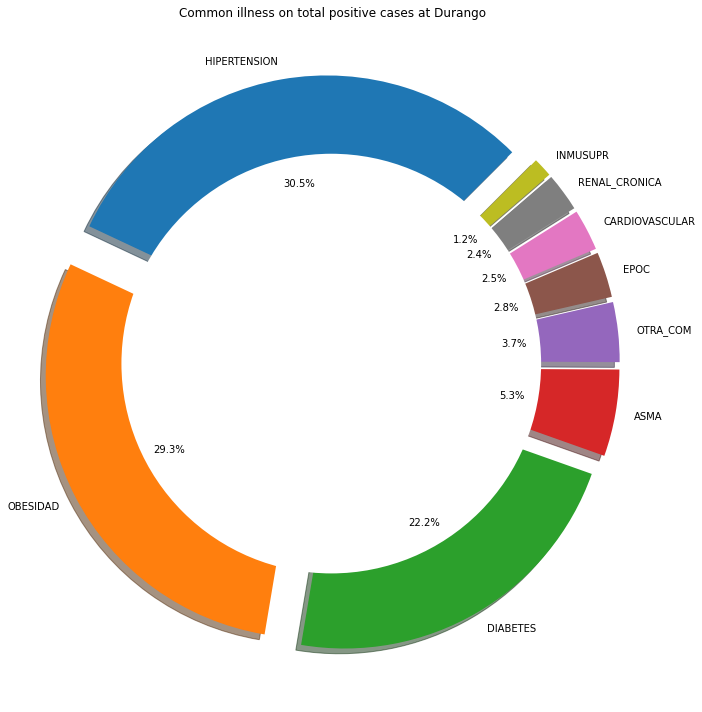

######################################### Estado De México #########################################
Most common illness on total positive cases at Estado De México = HIPERTENSION


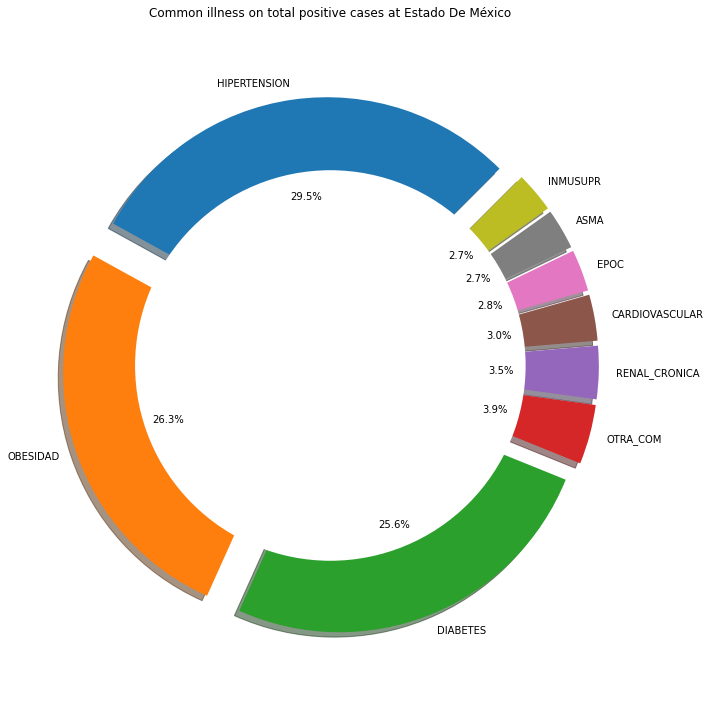

############################################ Guanajuato ############################################
Most common illness on total positive cases at Guanajuato = HIPERTENSION


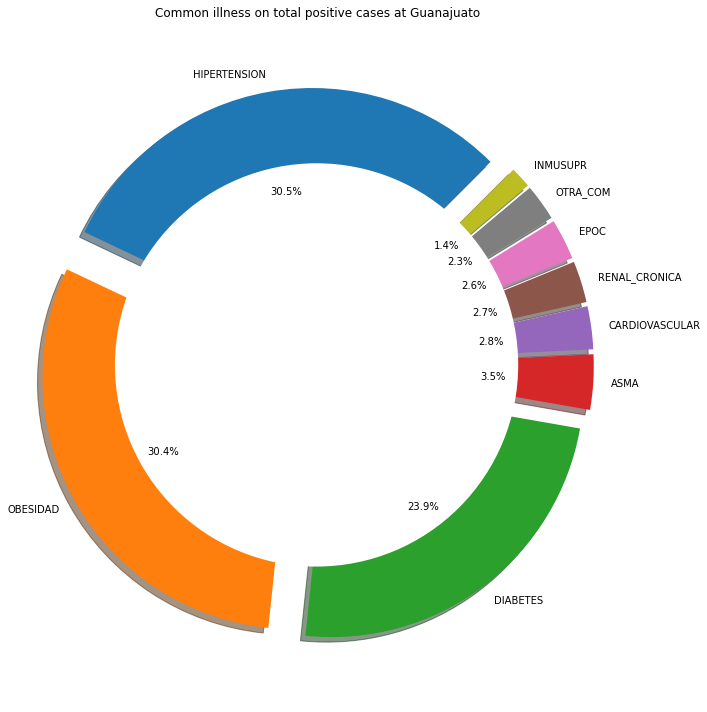

############################################# Guerrero #############################################
Most common illness on total positive cases at Guerrero = HIPERTENSION


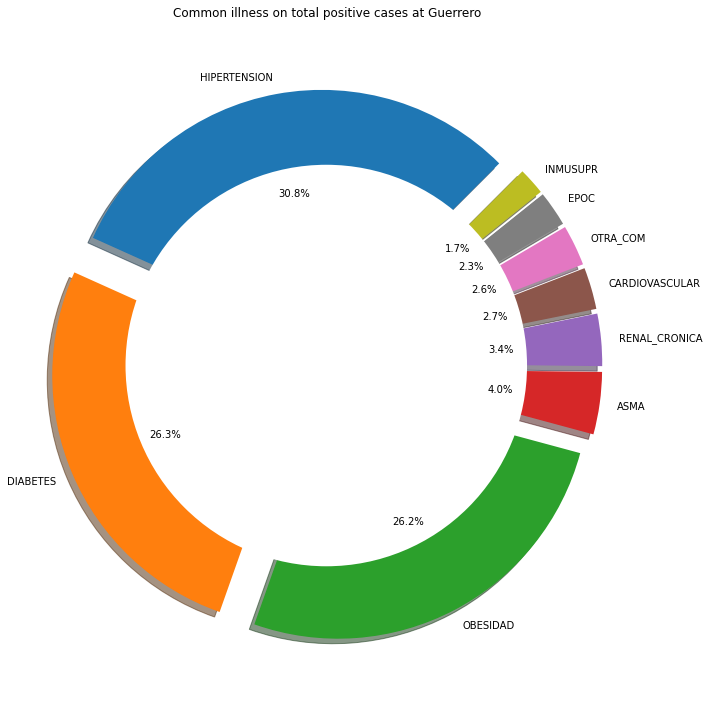

############################################# Hidalgo ##############################################
Most common illness on total positive cases at Hidalgo = HIPERTENSION


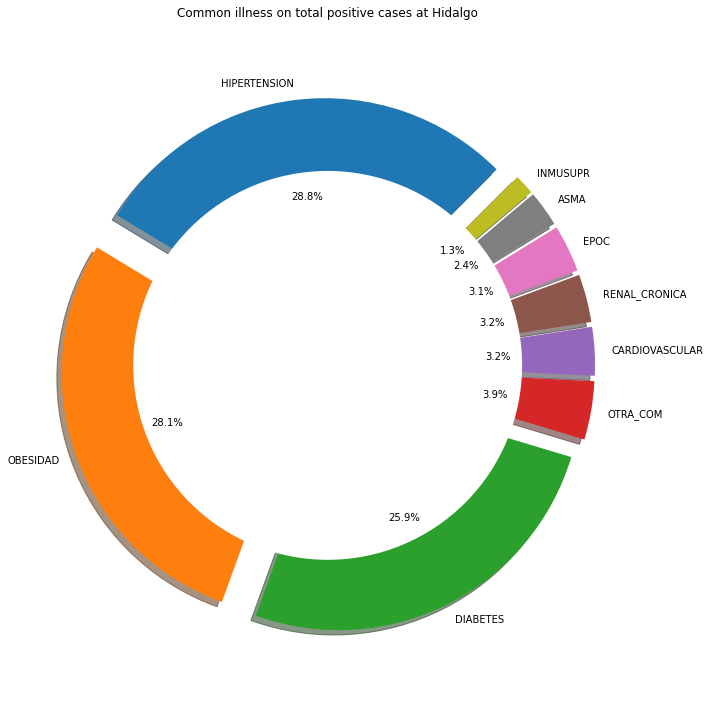

############################################# Jalisco ##############################################
Most common illness on total positive cases at Jalisco = HIPERTENSION


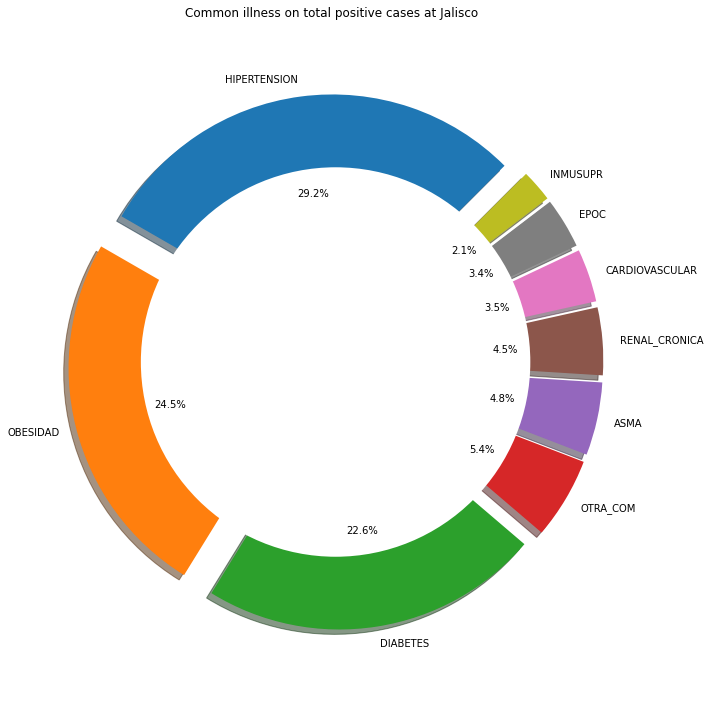

####################################### Michoacán De Ocampo ########################################
Most common illness on total positive cases at Michoacán De Ocampo = HIPERTENSION


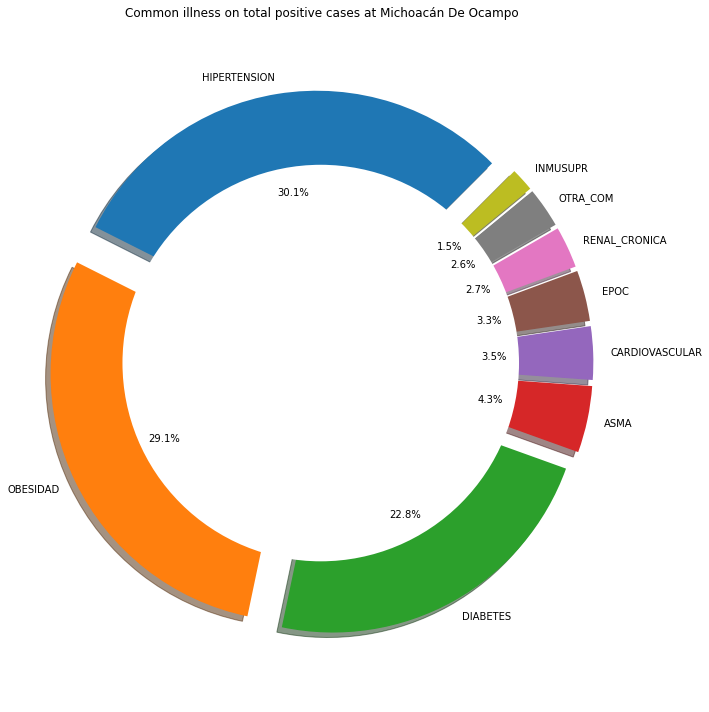

############################################# Morelos ##############################################
Most common illness on total positive cases at Morelos = HIPERTENSION


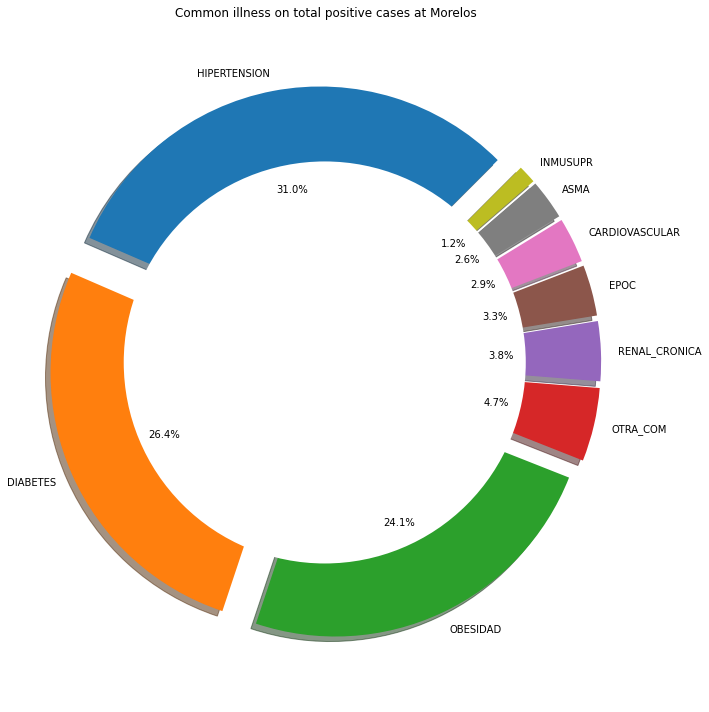

############################################# Nayarit ##############################################
Most common illness on total positive cases at Nayarit = HIPERTENSION


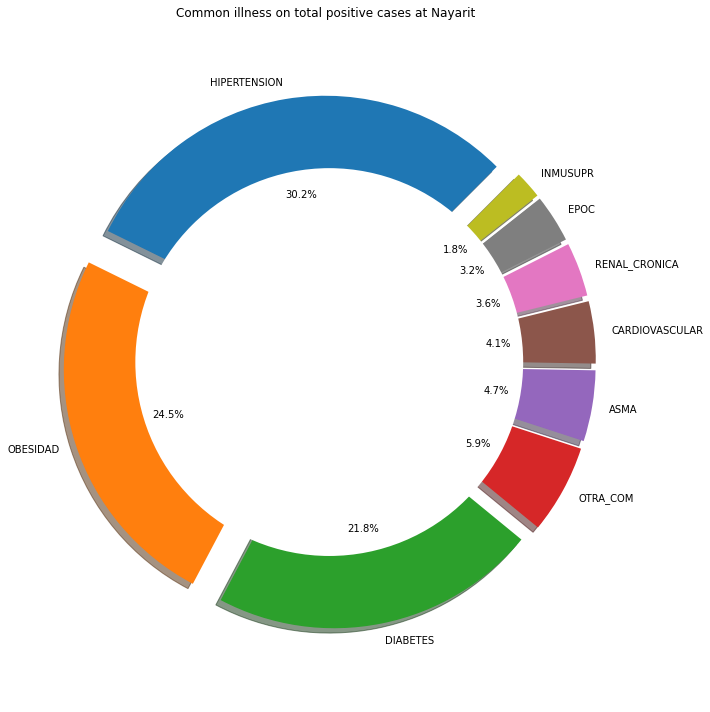

############################################ Nuevo León ############################################
Most common illness on total positive cases at Nuevo León = HIPERTENSION


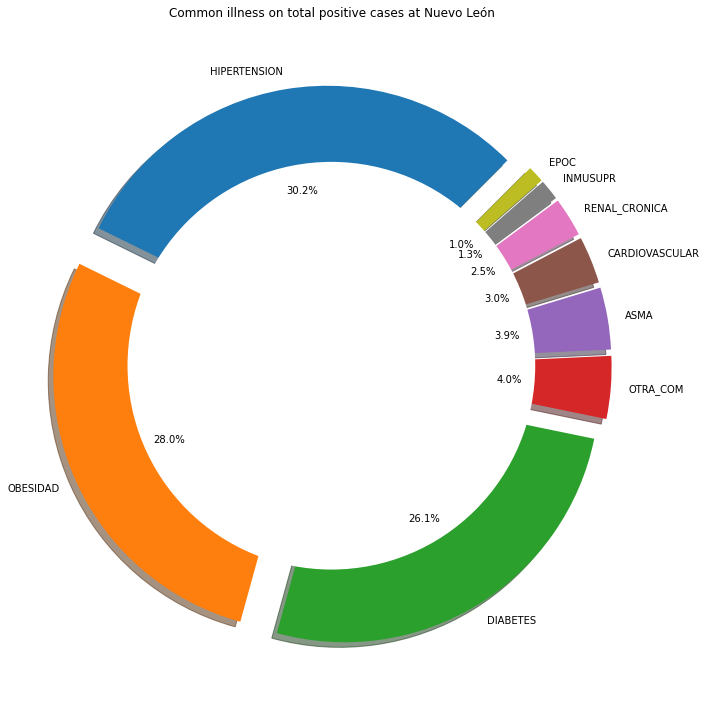

############################################## Oaxaca ##############################################
Most common illness on total positive cases at Oaxaca = OBESIDAD


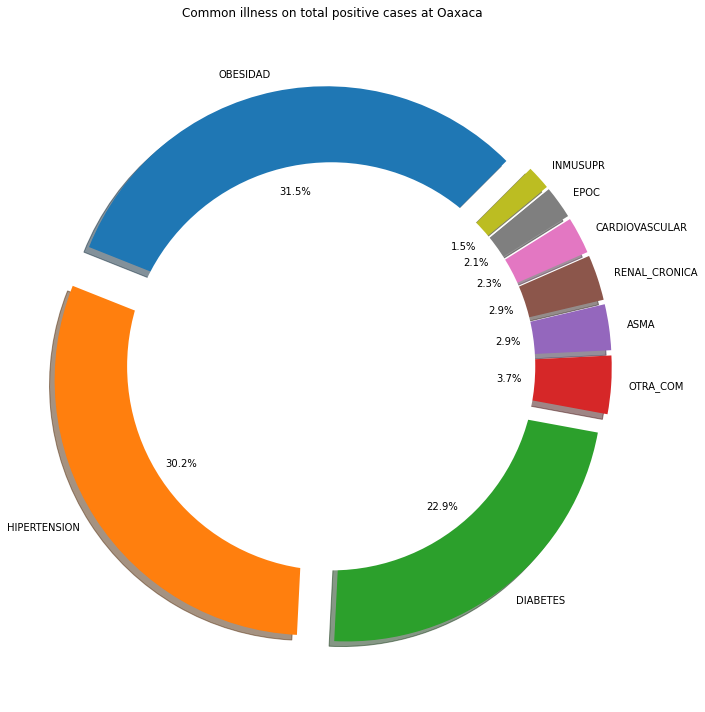

############################################## Puebla ##############################################
Most common illness on total positive cases at Puebla = HIPERTENSION


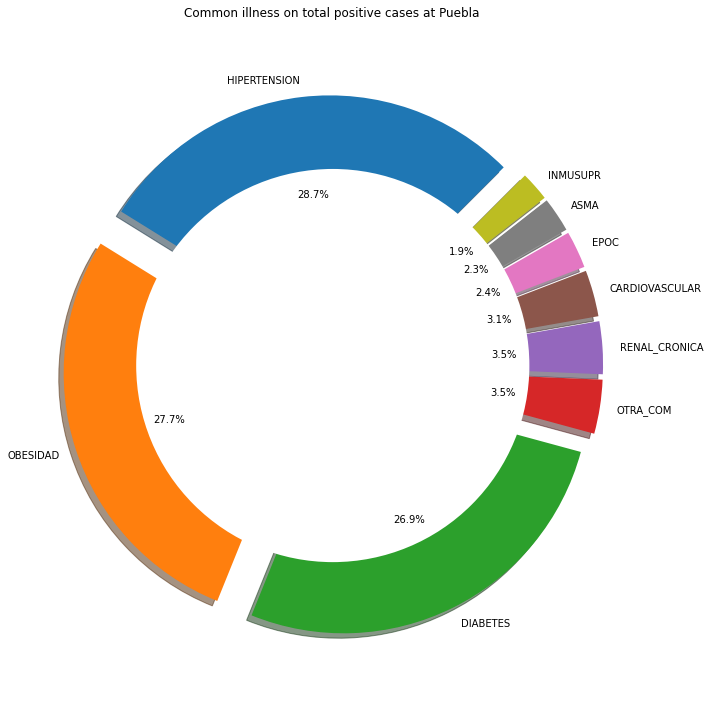

############################################ Querétaro #############################################
Most common illness on total positive cases at Querétaro = HIPERTENSION


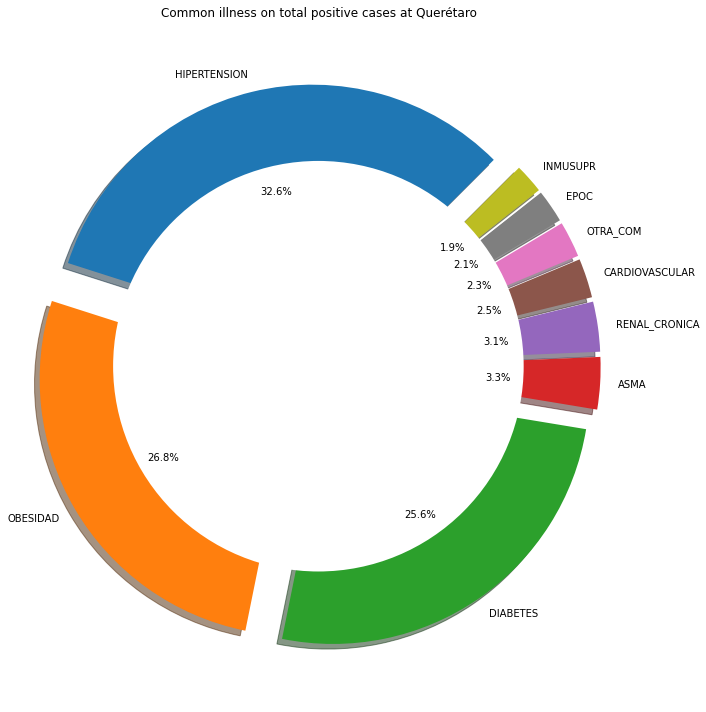

########################################### Quintana Roo ###########################################
Most common illness on total positive cases at Quintana Roo = HIPERTENSION


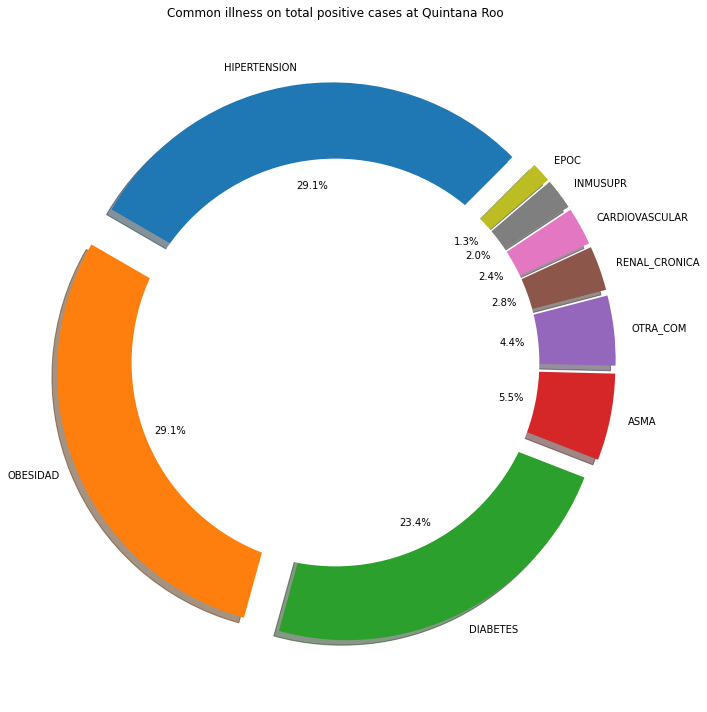

######################################### San Luis Potosí ##########################################
Most common illness on total positive cases at San Luis Potosí = HIPERTENSION


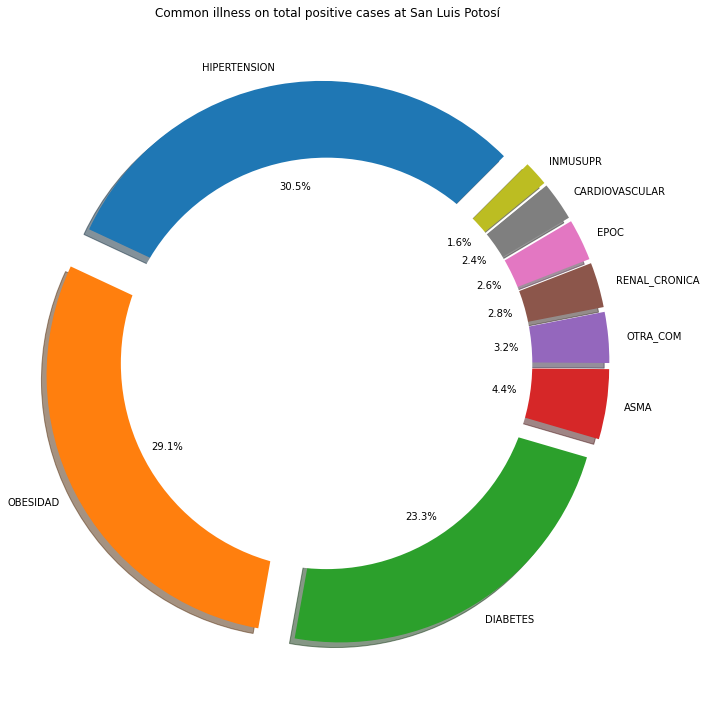

############################################# Sinaloa ##############################################
Most common illness on total positive cases at Sinaloa = HIPERTENSION


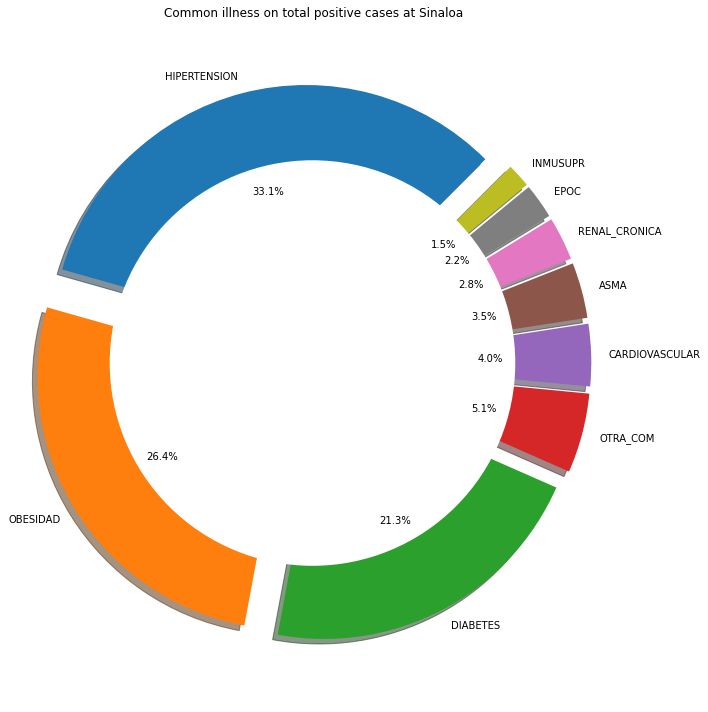

############################################## Sonora ##############################################
Most common illness on total positive cases at Sonora = HIPERTENSION


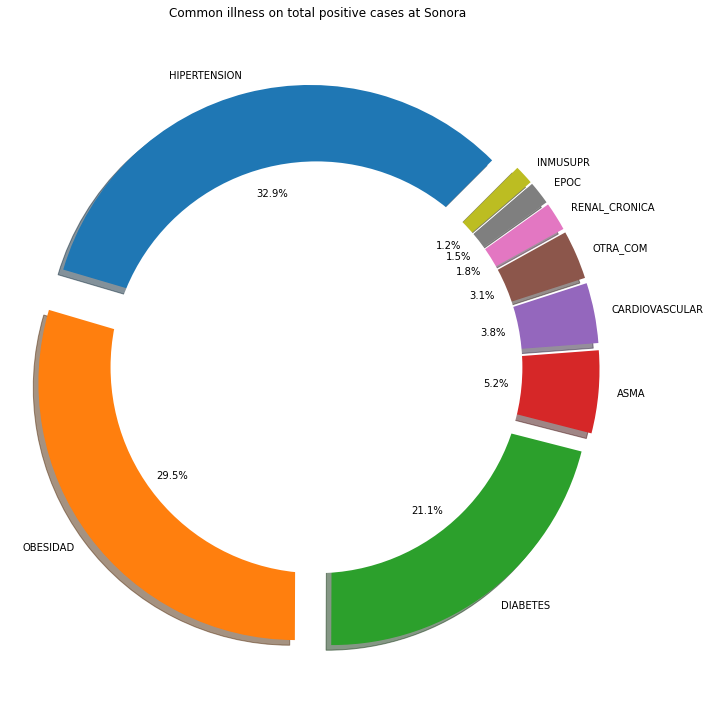

############################################# Tabasco ##############################################
Most common illness on total positive cases at Tabasco = OBESIDAD


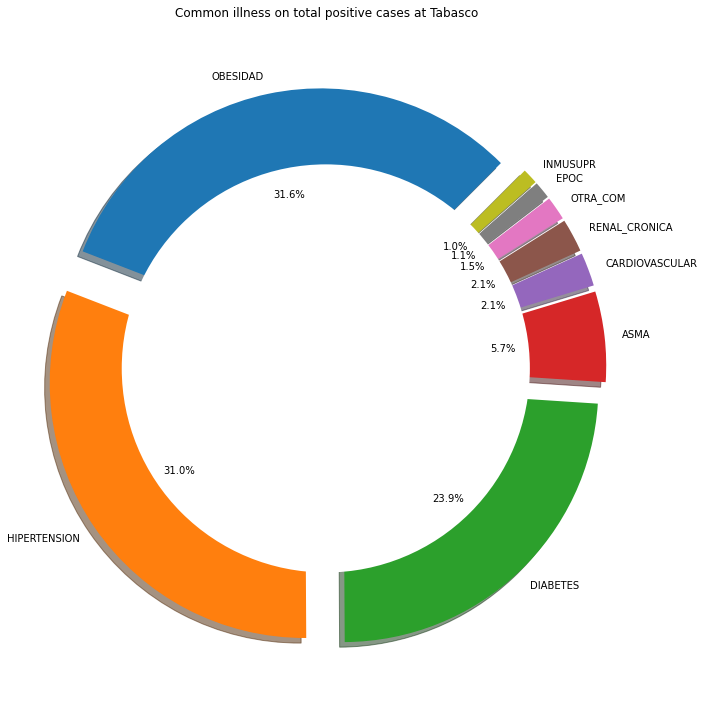

############################################ Tamaulipas ############################################
Most common illness on total positive cases at Tamaulipas = HIPERTENSION


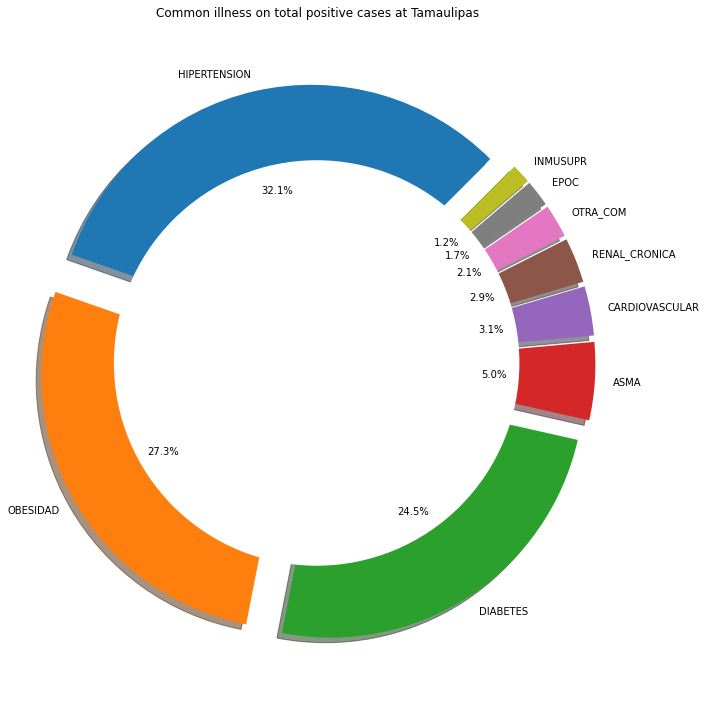

############################################# Tlaxcala #############################################
Most common illness on total positive cases at Tlaxcala = HIPERTENSION


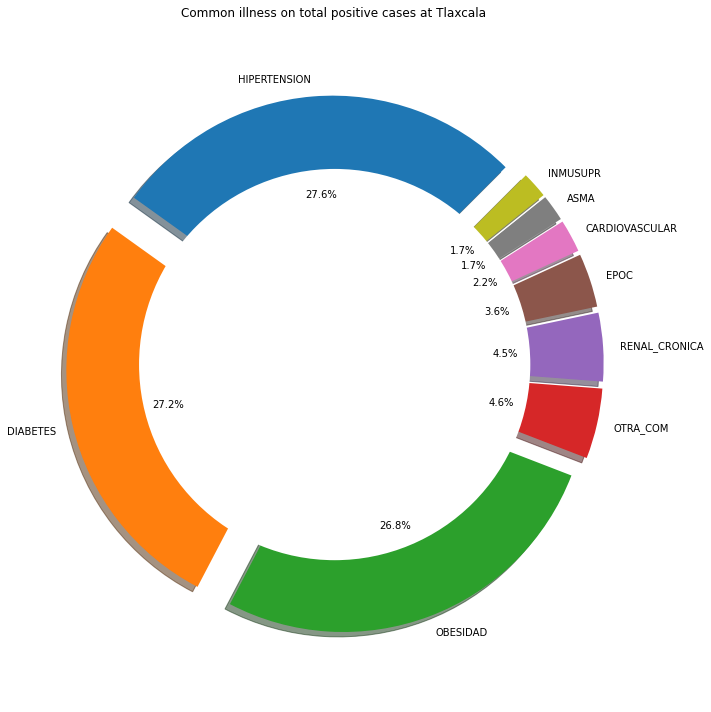

################################# Veracruz De Ignacio De La Llave ##################################
Most common illness on total positive cases at Veracruz De Ignacio De La Llave = HIPERTENSION


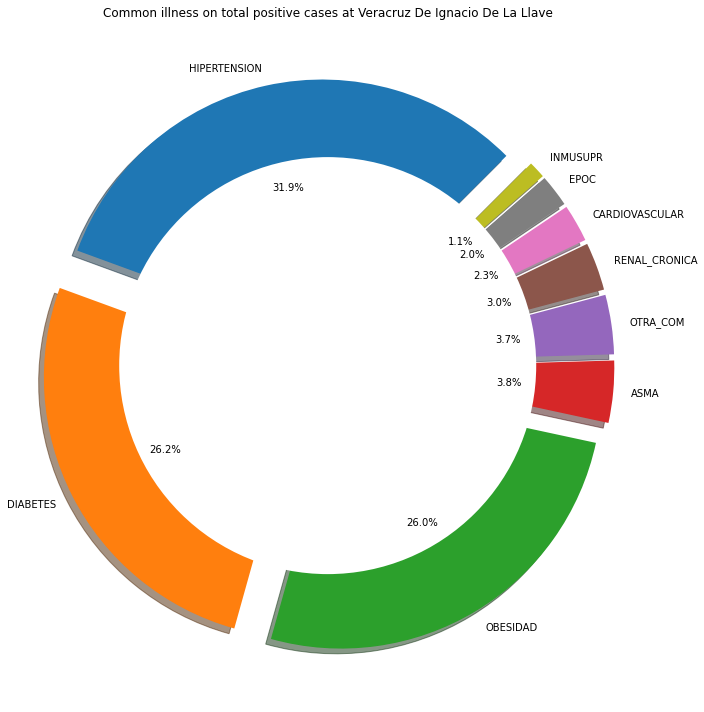

############################################# Yucatán ##############################################
Most common illness on total positive cases at Yucatán = HIPERTENSION


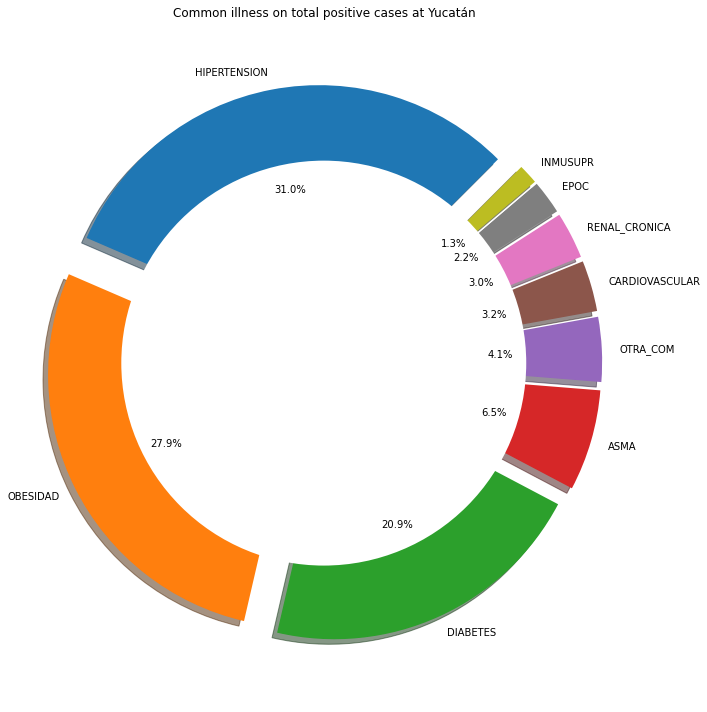

############################################ Zacatecas #############################################
Most common illness on total positive cases at Zacatecas = HIPERTENSION


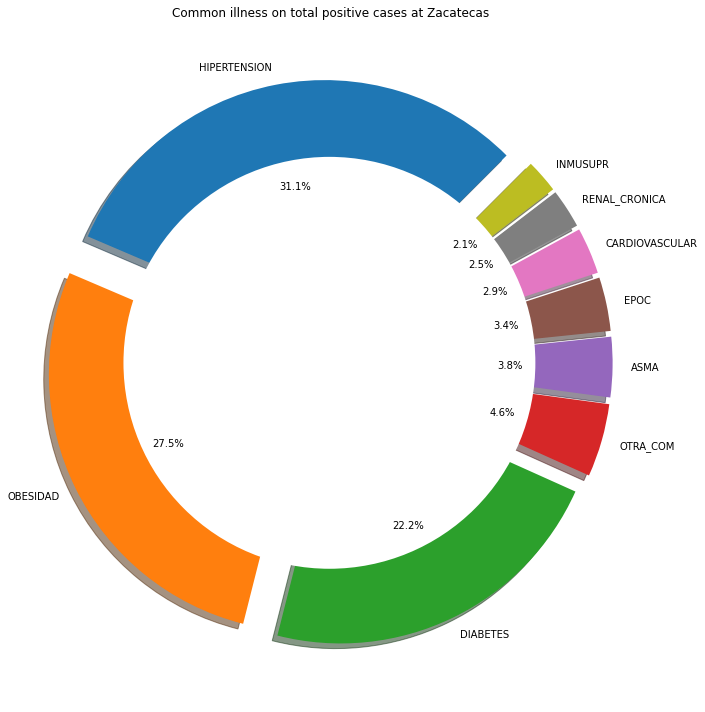

In [13]:
##### Common illness on total positive cases by state

for state in sorted(df_cov.ENTIDAD_RES.unique()):
    print(f' {state} '.center(100,'#'))
    # Data Extraction
    ill_name = ['DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA']
    dict_ill_pos = dict()
    for name in ill_name:
        dict_ill_pos[name] = df_positive_cases.query(f'{name} == 1 & ENTIDAD_RES == "{state}"').shape[0]
    print(f'Most common illness on total positive cases at {state} = {max(dict_ill_pos, key=dict_ill_pos.get)}')
    # Data Visualization
    graph_pie(dict_ill_pos,f'Common illness on total positive cases at {state}')

## Deceased COVID-19 cases

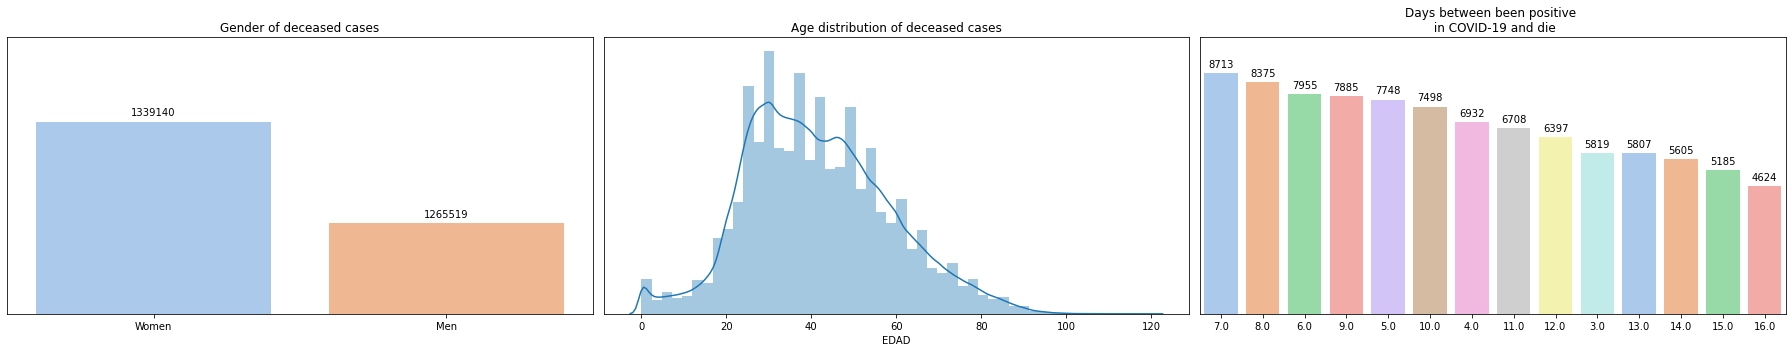

In [14]:
##### Analysis of total number of deceased cases
# FECHA_DEF has 9999-99-99 when a person COVID-19 confirmed. didn't die.

df_deceased_cases =  df_cov[df_cov['FECHA_DEF'] !='9999-99-99']

fig, axes = plt.subplots(1, 3, figsize=(25, 5))

# 1st graph - Gender of positive cases
axes[0].set_title('Gender of deceased cases')
plot = sns.barplot(x = ['Women','Men'],y = df_deceased_cases['SEXO'].value_counts().values, palette = 'pastel', ax = axes[0])
plot.set(ylim = (1200000,1400000), ylabel = None, yticklabels = [])
plot.tick_params(left=False)
autolabel(plot)

# 2nd graph - Age distribution of deceased cases
axes[1].set_title('Age distribution of deceased cases')
plot = sns.distplot(df_deceased_cases.EDAD, ax = axes[1])
plot.set(ylabel = None, yticklabels = [])
plot.tick_params(left=False)

# 3rd graph - Time between FECHA_SINTOMA and FECHA_DEF when a person die of COVID-19
axes[2].set_title('Days between been positive \n in COVID-19 and die')
data = df_cov['DIFERENCIA'].value_counts()
plot = sns.barplot(x = data.index[1:15], y = data.values[1:15], 
                   palette = 'pastel', order = data.index[1:15], ax = axes[2])
plot.set(ylim = (None,10000), ylabel = None, yticklabels = [])
plot.tick_params(left=False)
autolabel(plot)

plt.tight_layout()
plt.show()

################### Total number of deceased cases = 2604659 | % of total = 1.0% ###################


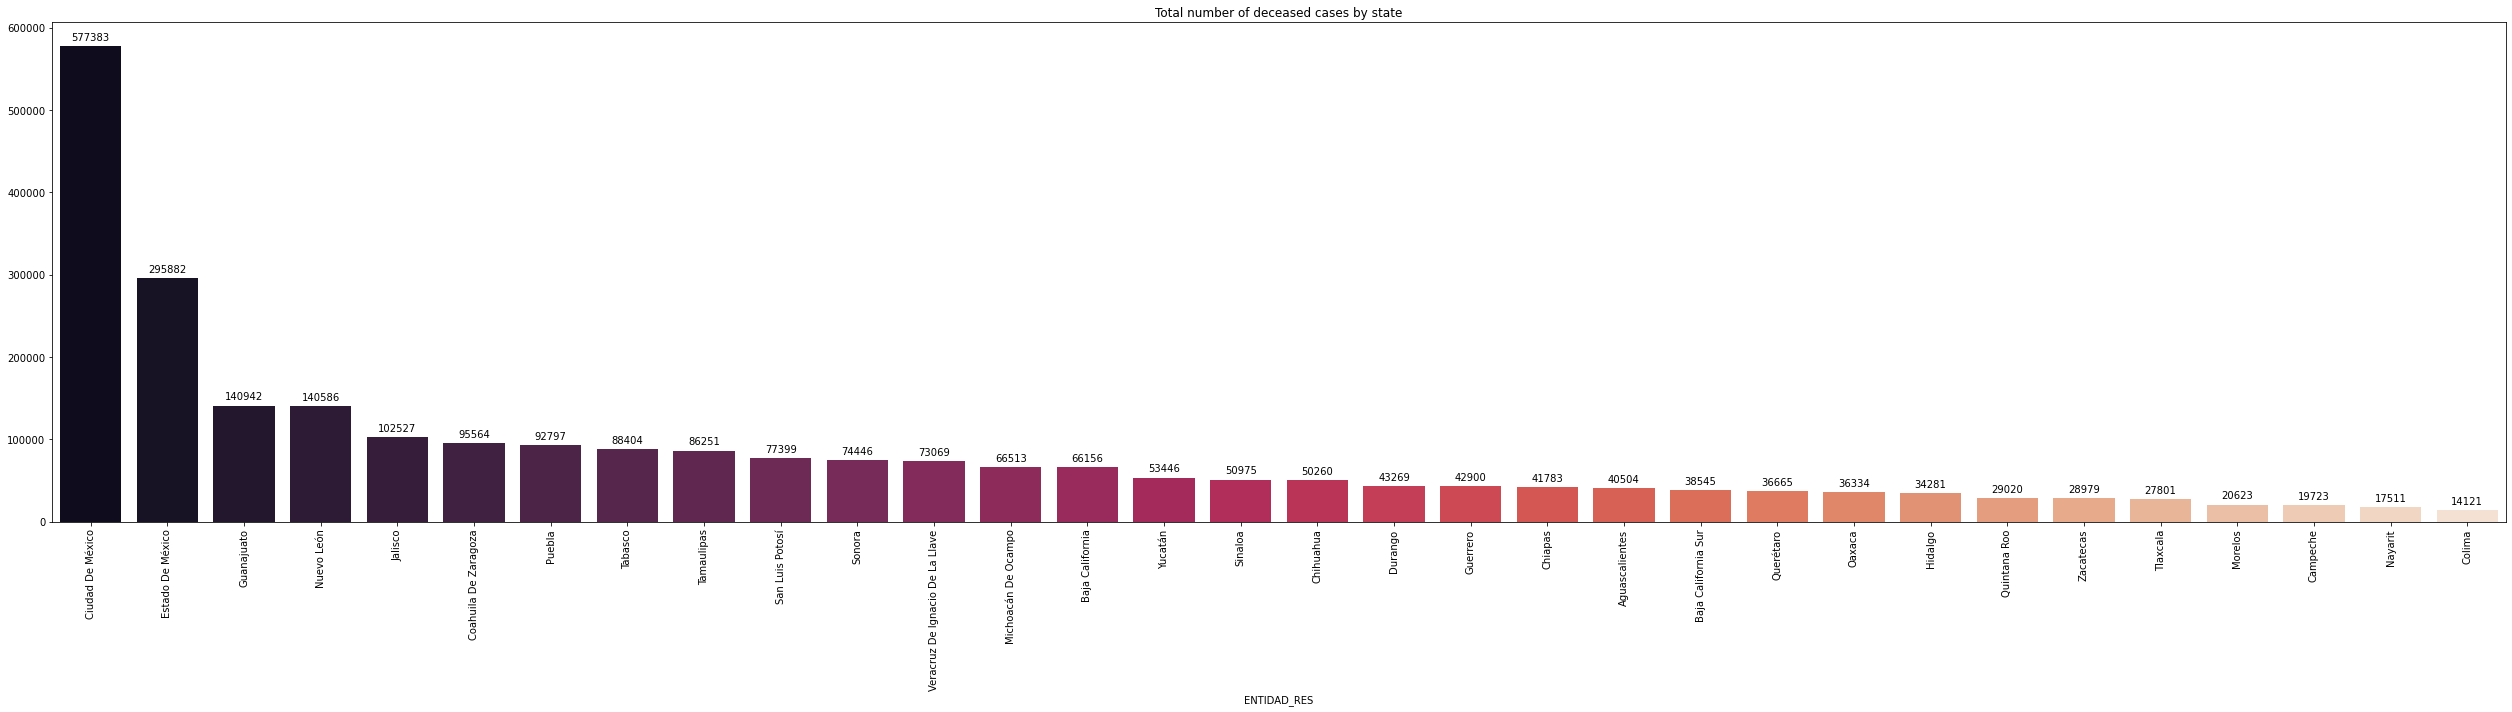

In [15]:
##### Total number of deceased cases by state

# Data Extraction
print(f' Total number of deceased cases = {df_deceased_cases.shape[0]} | % of total = {(df_deceased_cases.shape[0]/df_cov.shape[0]):.3}% '.center(100,'#'))
data = df_deceased_cases.groupby('ENTIDAD_RES').count()['CLASIFICACION_FINAL'].sort_values(ascending = False)

# Data Visualization
graph_bar(data, 'Total number of deceased cases by state')

############################# Total mean age of deceased cases = 41.5 ##############################


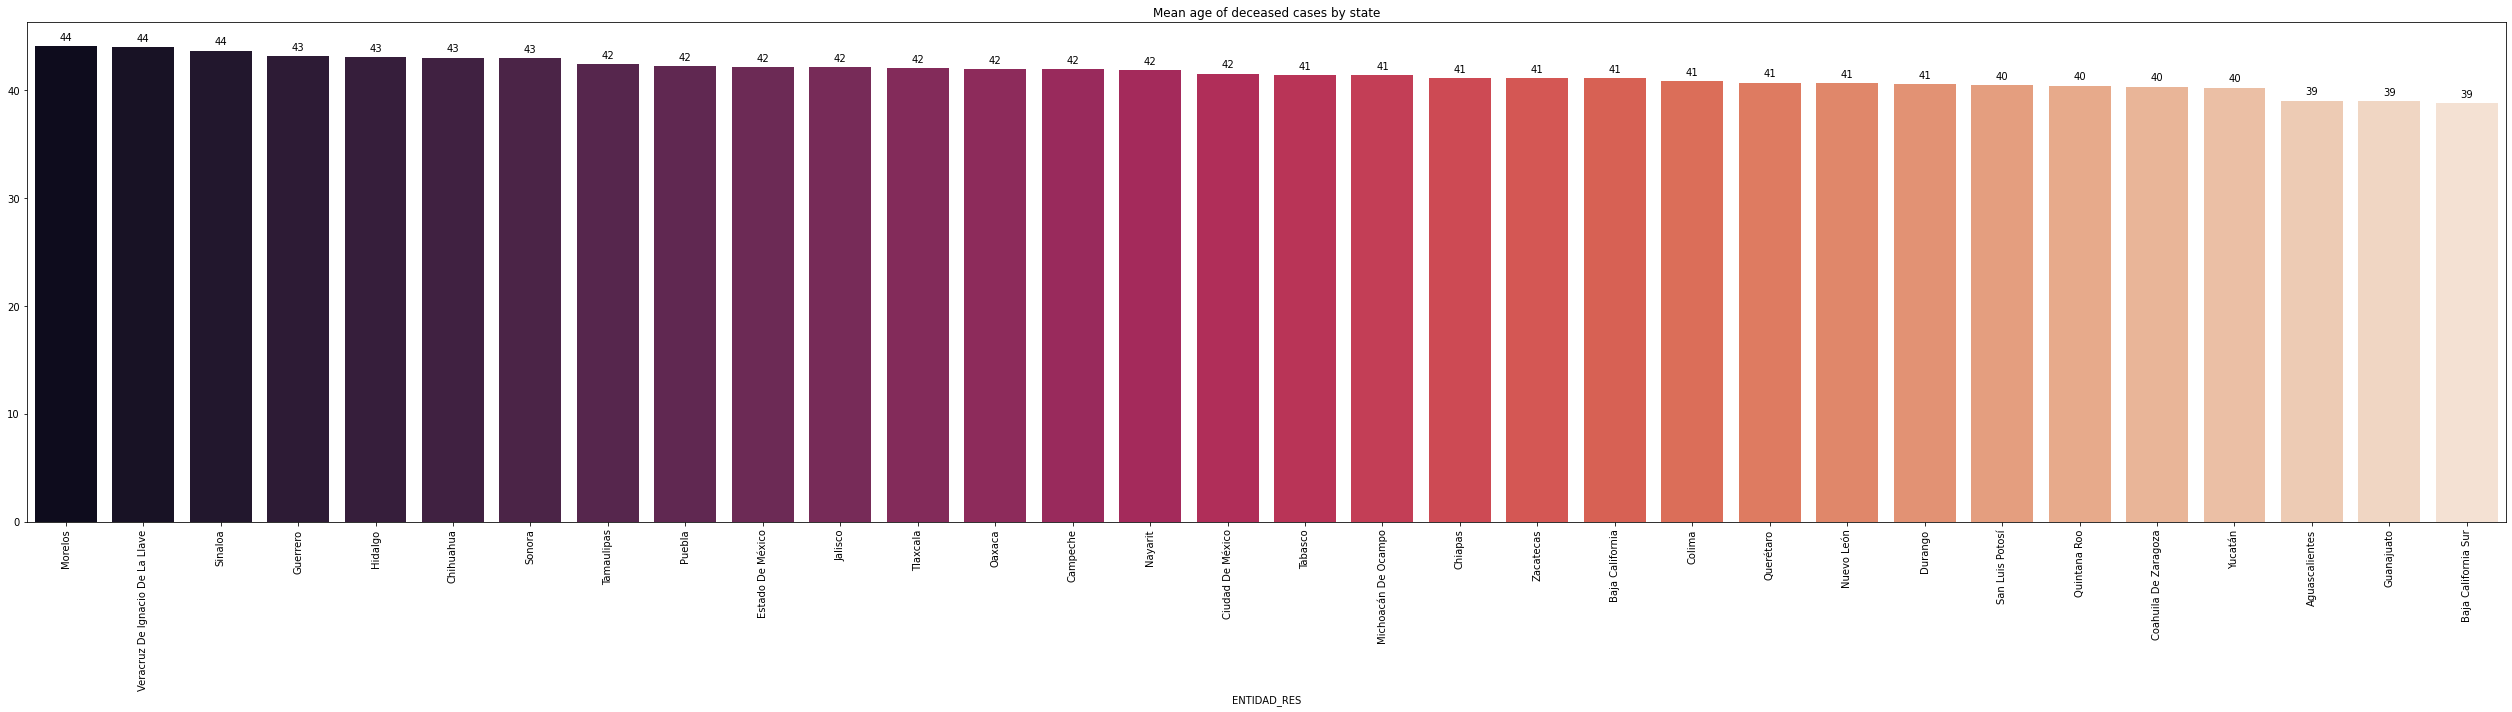

In [16]:
##### Mean age of deceased cases by state

# Data Extraction
print(f' Total mean age of deceased cases = {(df_deceased_cases.EDAD.mean()):.3} '.center(100,'#'))
data = df_deceased_cases.groupby('ENTIDAD_RES').mean()['EDAD'].sort_values(ascending = False)

# Data Visualization
graph_bar(data, 'Mean age of deceased cases by state')

################### Most common illness on total deceased cases  = HIPERTENSION ####################


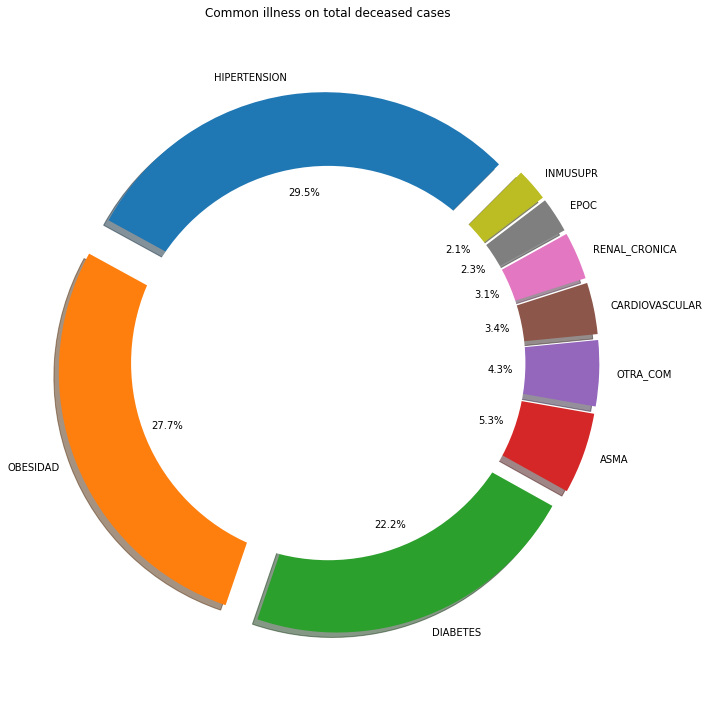

In [17]:
##### Common illness on total deceased cases 

# Data Extraction
ill_name = ['DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA']
dict_ill_dec = dict()
for name in ill_name:
    dict_ill_dec[name] = df_deceased_cases.query(f'{name} == 1').shape[0]
print(f' Most common illness on total deceased cases  = {max(dict_ill_dec, key=dict_ill_dec.get)} '.center(100,'#'))

# Data Visualization
graph_pie(dict_ill_dec,'Common illness on total deceased cases')

########################################## Aguascalientes ##########################################
Most common illness on total positive cases at Aguascalientes = HIPERTENSION


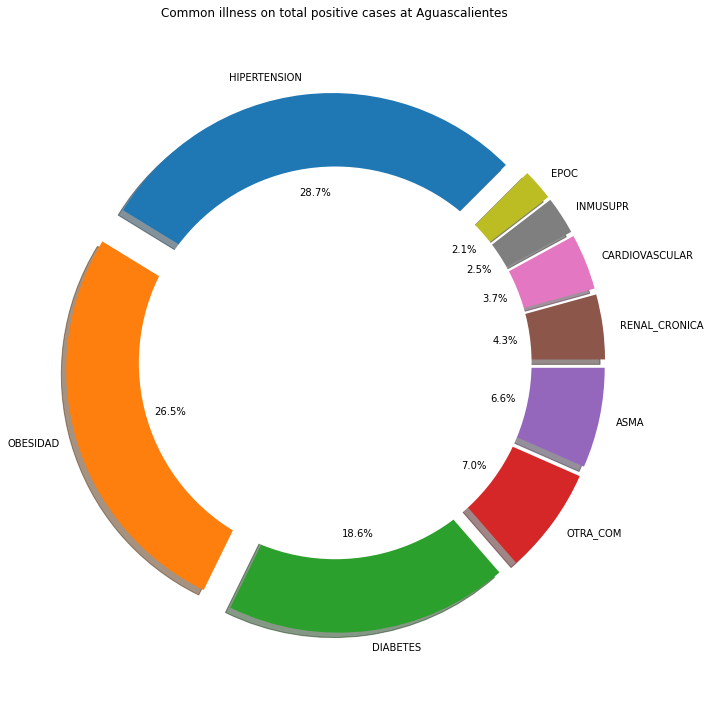

######################################### Baja California ##########################################
Most common illness on total positive cases at Baja California = HIPERTENSION


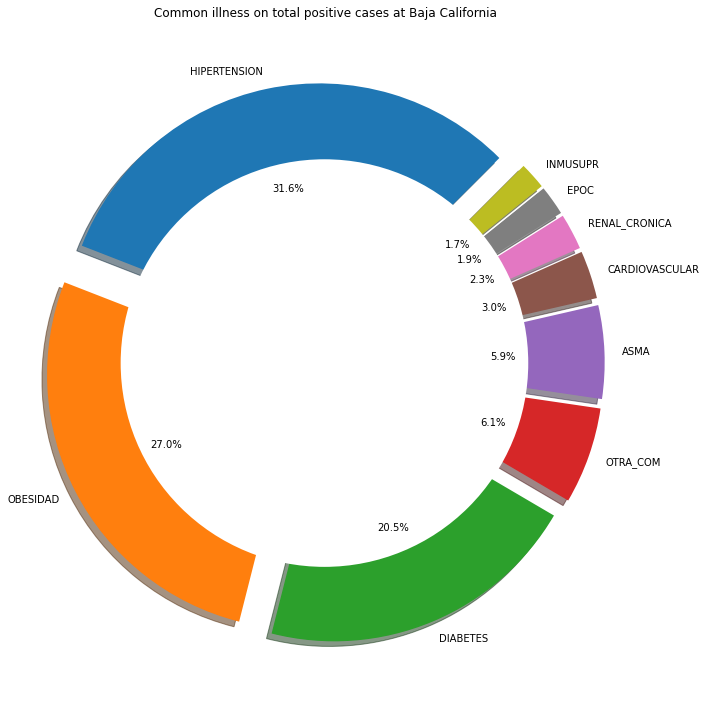

####################################### Baja California Sur ########################################
Most common illness on total positive cases at Baja California Sur = OBESIDAD


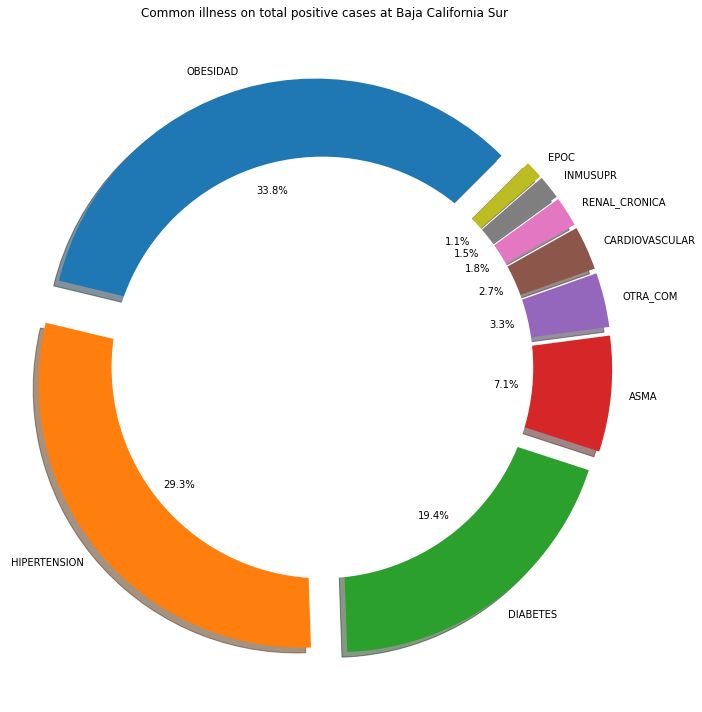

############################################# Campeche #############################################
Most common illness on total positive cases at Campeche = OBESIDAD


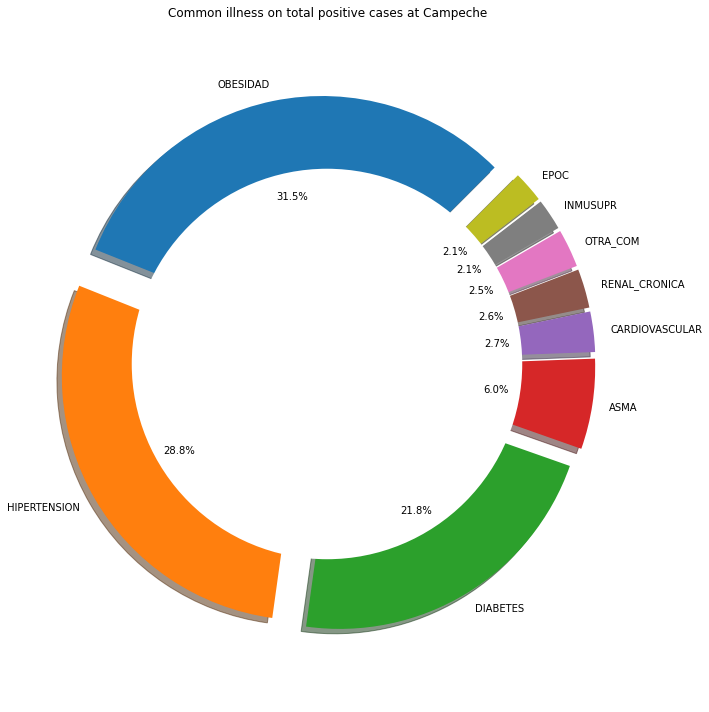

############################################# Chiapas ##############################################
Most common illness on total positive cases at Chiapas = HIPERTENSION


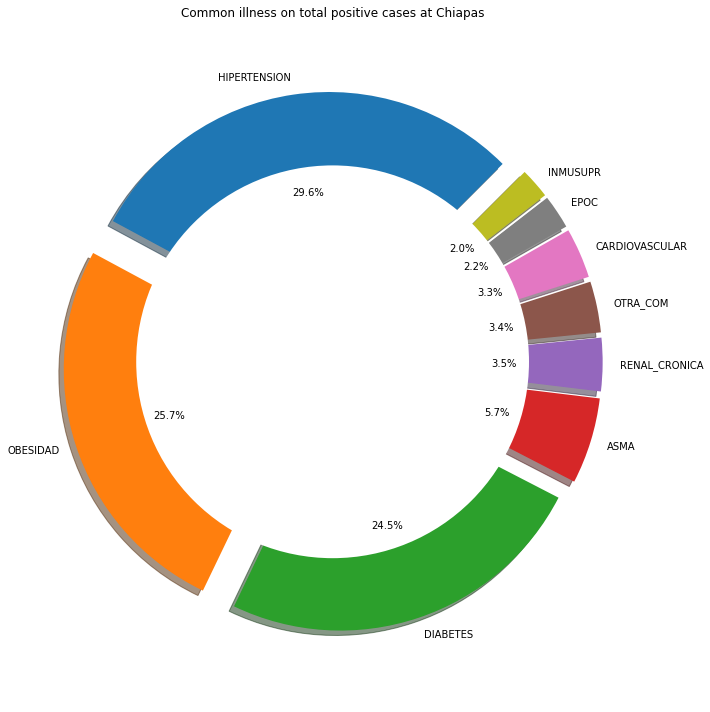

############################################ Chihuahua #############################################
Most common illness on total positive cases at Chihuahua = HIPERTENSION


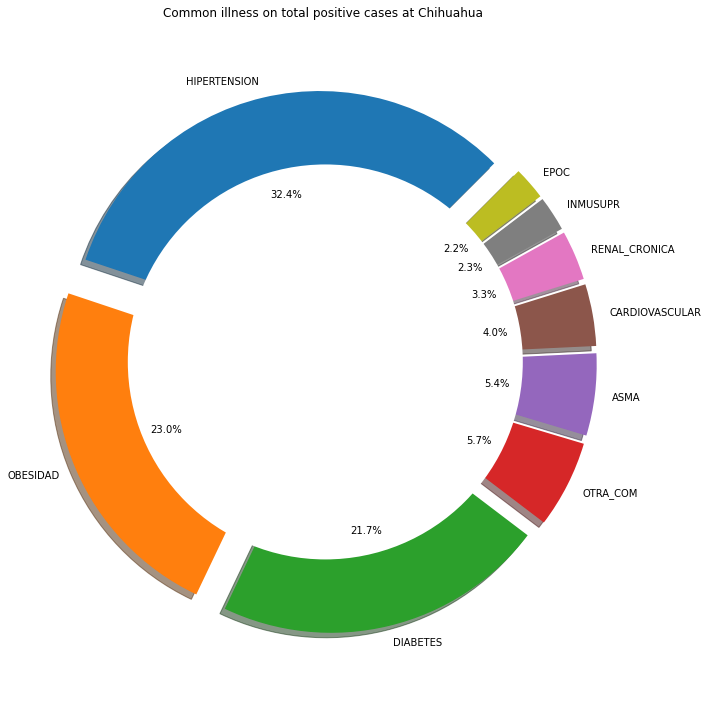

######################################### Ciudad De México #########################################
Most common illness on total positive cases at Ciudad De México = HIPERTENSION


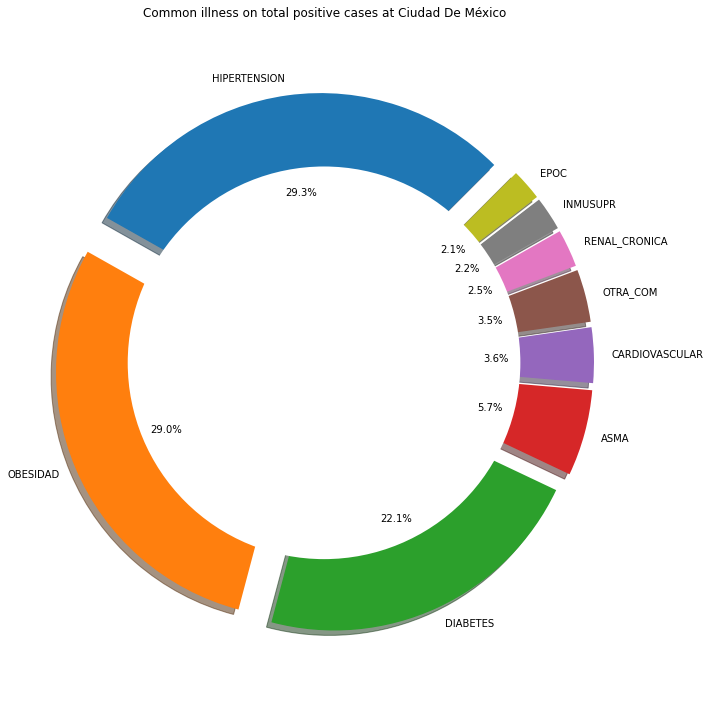

####################################### Coahuila De Zaragoza #######################################
Most common illness on total positive cases at Coahuila De Zaragoza = HIPERTENSION


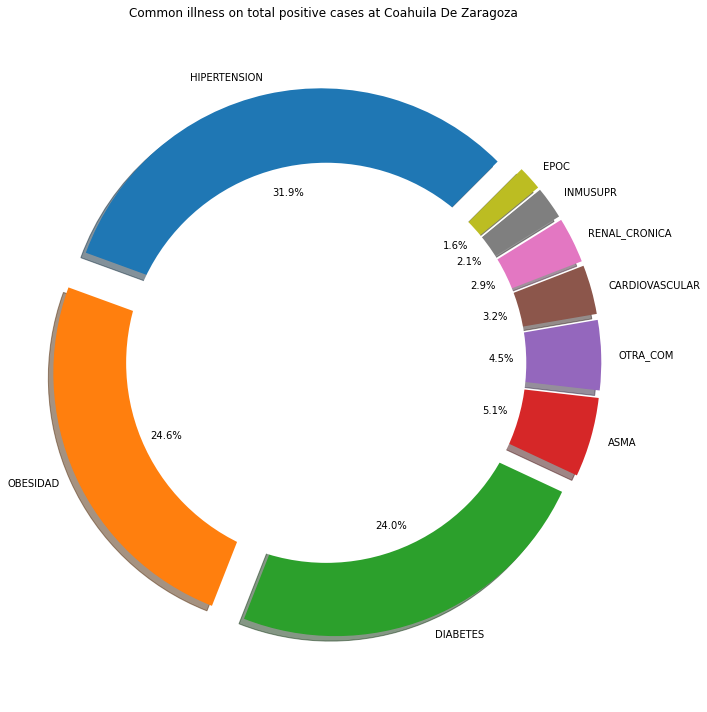

############################################## Colima ##############################################
Most common illness on total positive cases at Colima = OBESIDAD


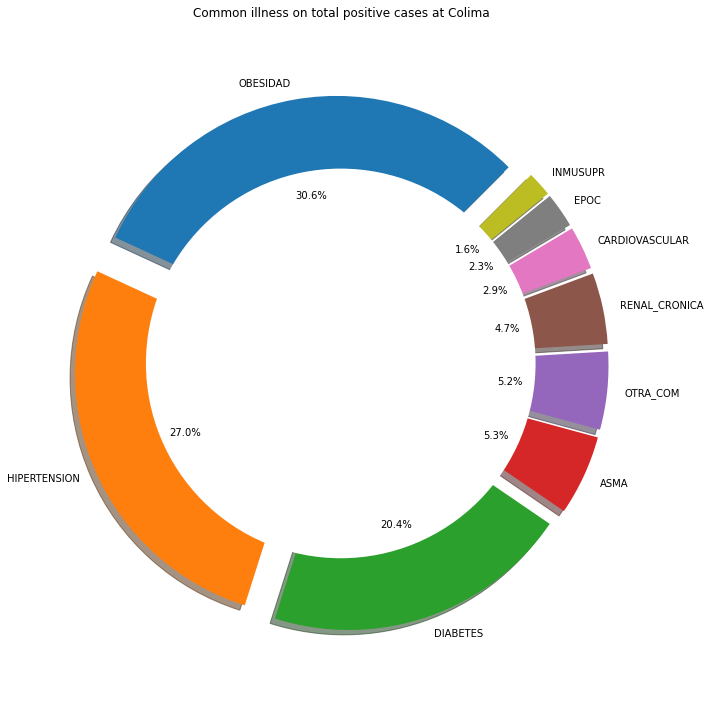

############################################# Durango ##############################################
Most common illness on total positive cases at Durango = HIPERTENSION


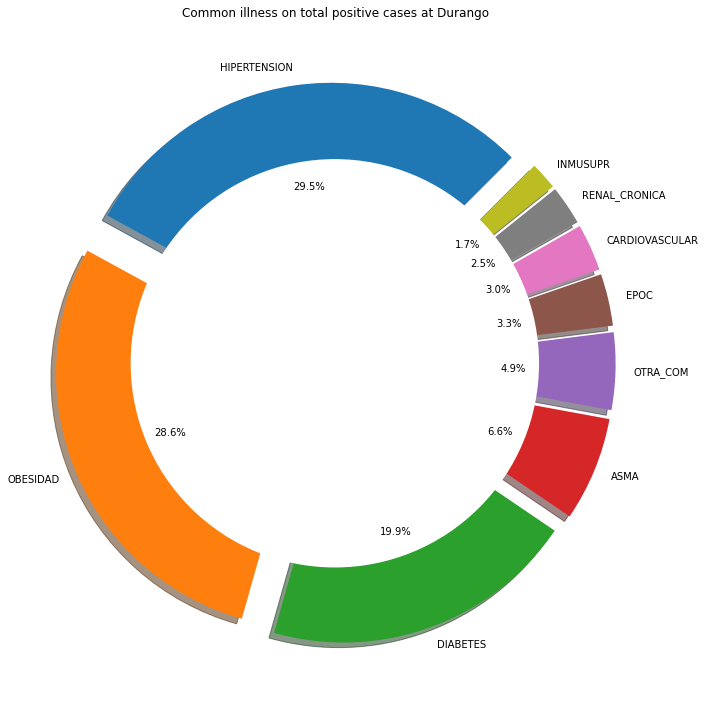

######################################### Estado De México #########################################
Most common illness on total positive cases at Estado De México = HIPERTENSION


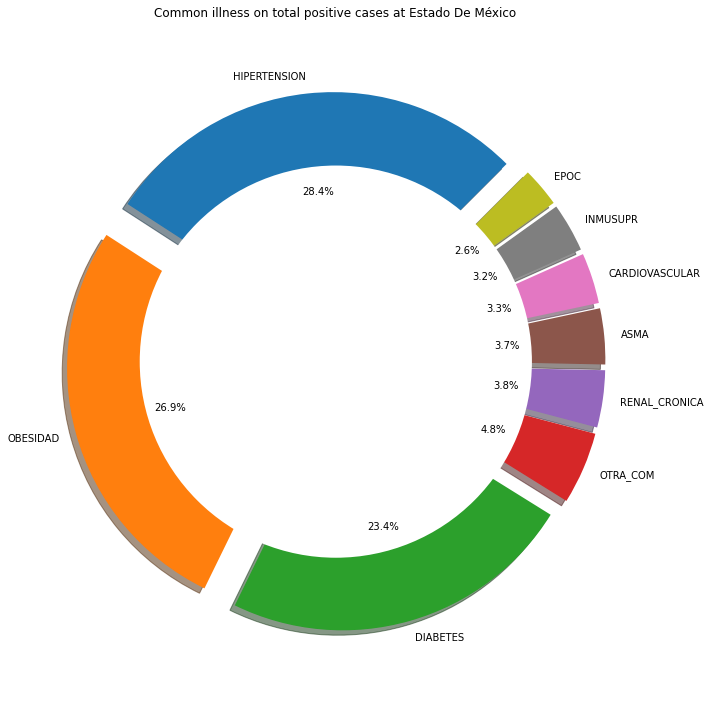

############################################ Guanajuato ############################################
Most common illness on total positive cases at Guanajuato = OBESIDAD


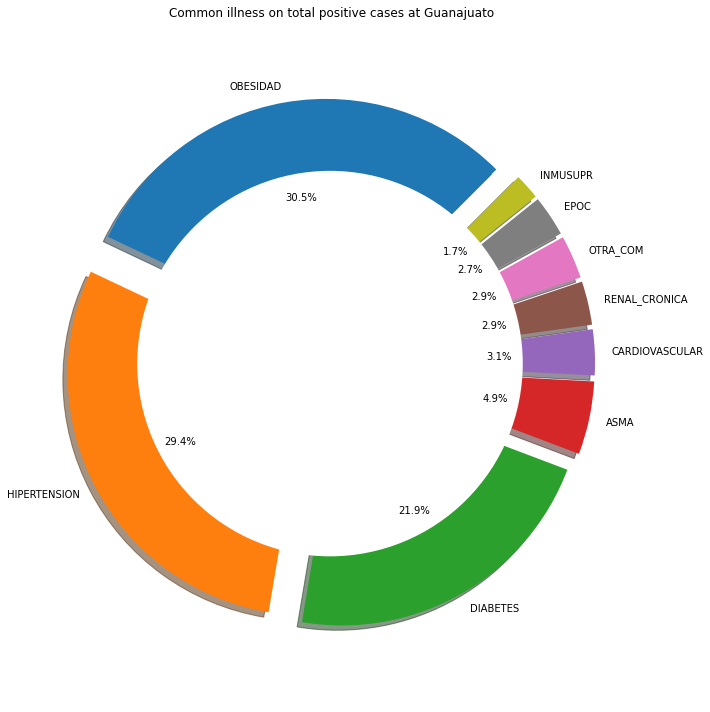

############################################# Guerrero #############################################
Most common illness on total positive cases at Guerrero = HIPERTENSION


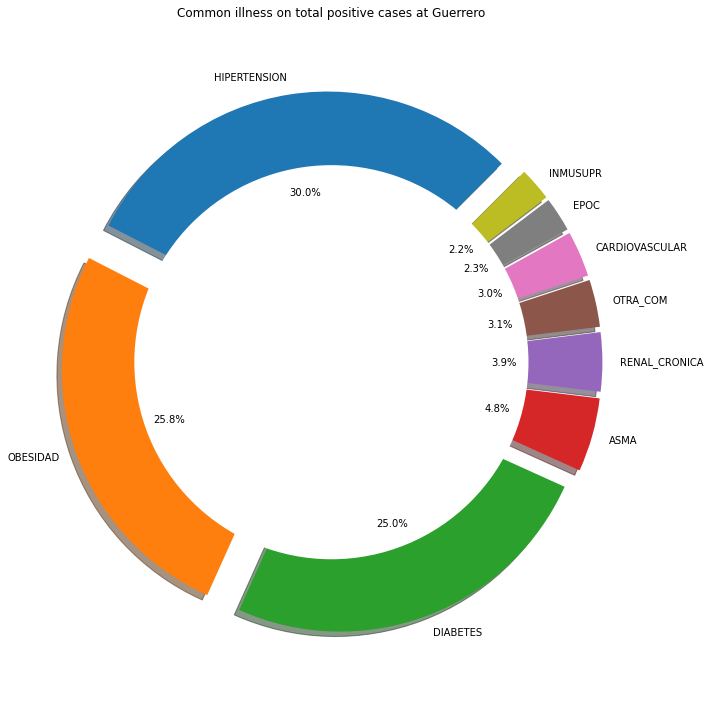

############################################# Hidalgo ##############################################
Most common illness on total positive cases at Hidalgo = OBESIDAD


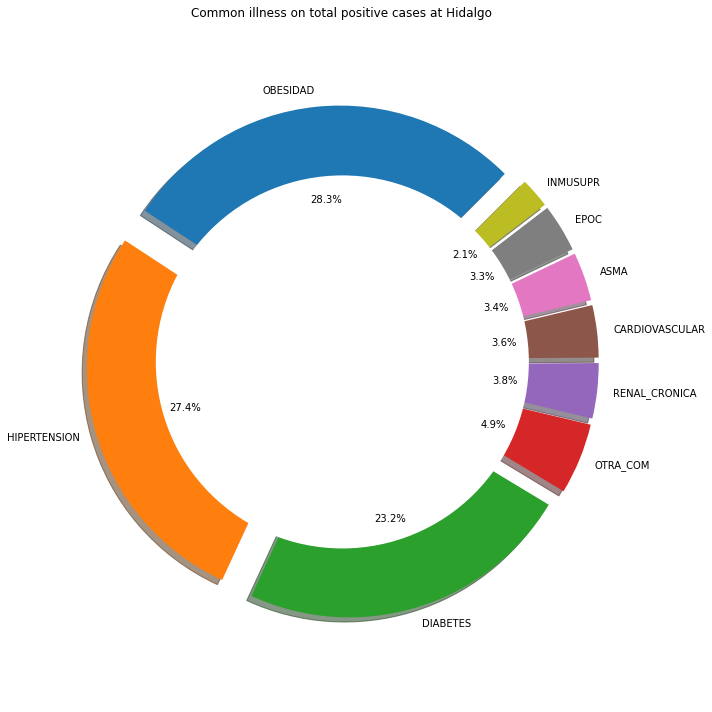

############################################# Jalisco ##############################################
Most common illness on total positive cases at Jalisco = HIPERTENSION


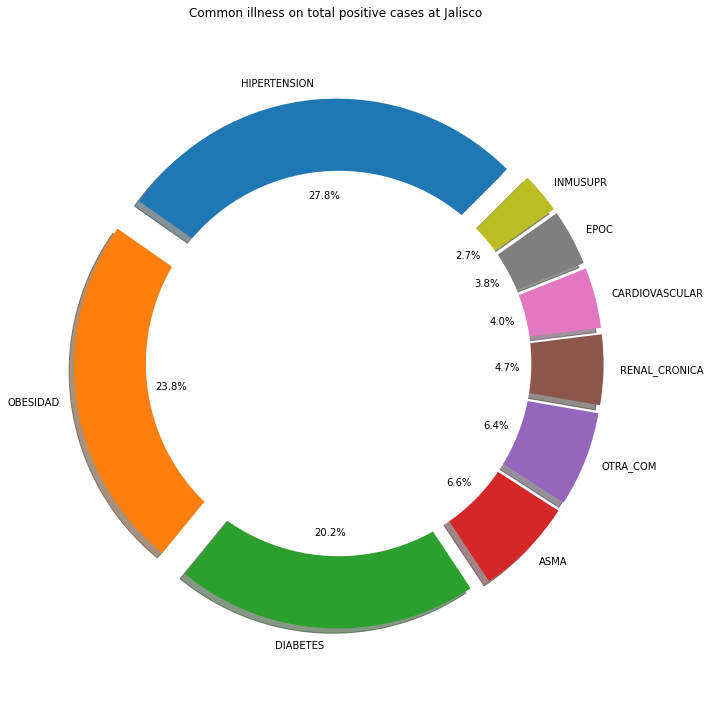

####################################### Michoacán De Ocampo ########################################
Most common illness on total positive cases at Michoacán De Ocampo = OBESIDAD


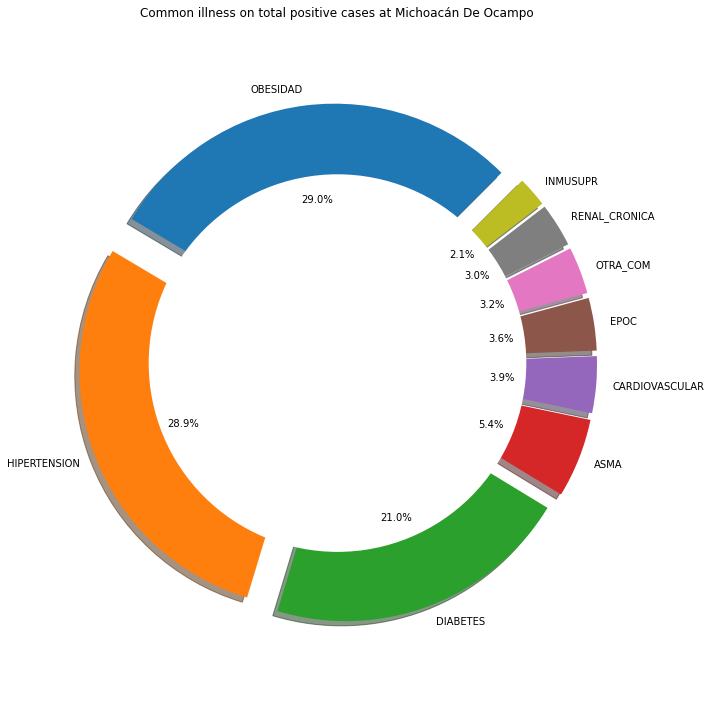

############################################# Morelos ##############################################
Most common illness on total positive cases at Morelos = HIPERTENSION


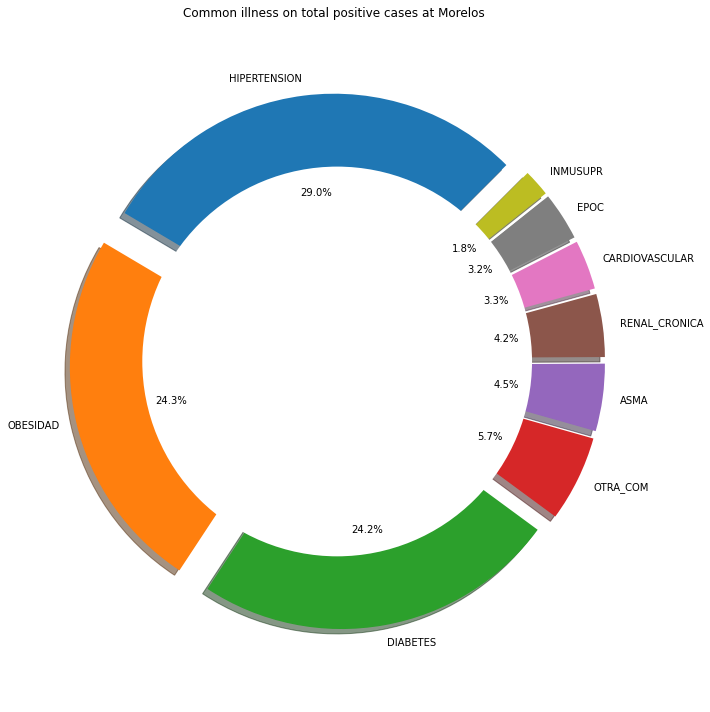

############################################# Nayarit ##############################################
Most common illness on total positive cases at Nayarit = HIPERTENSION


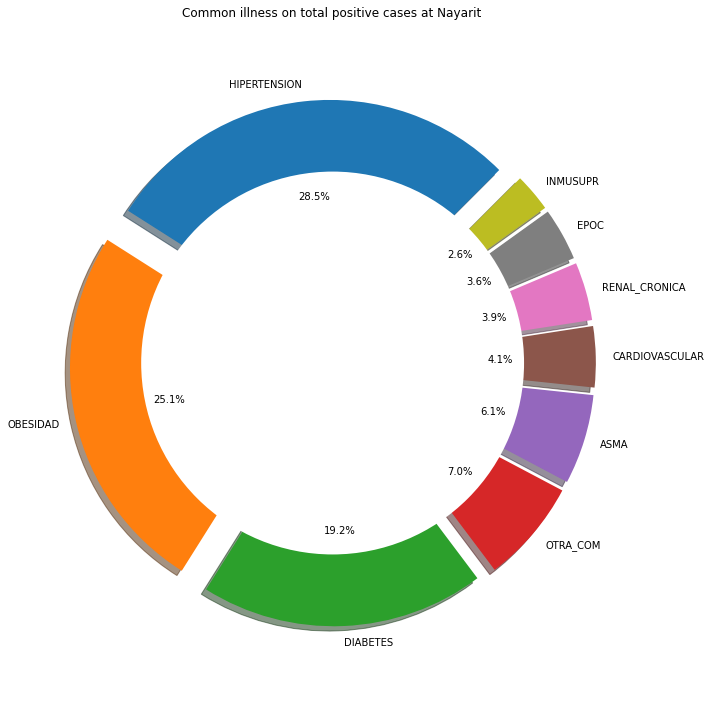

############################################ Nuevo León ############################################
Most common illness on total positive cases at Nuevo León = HIPERTENSION


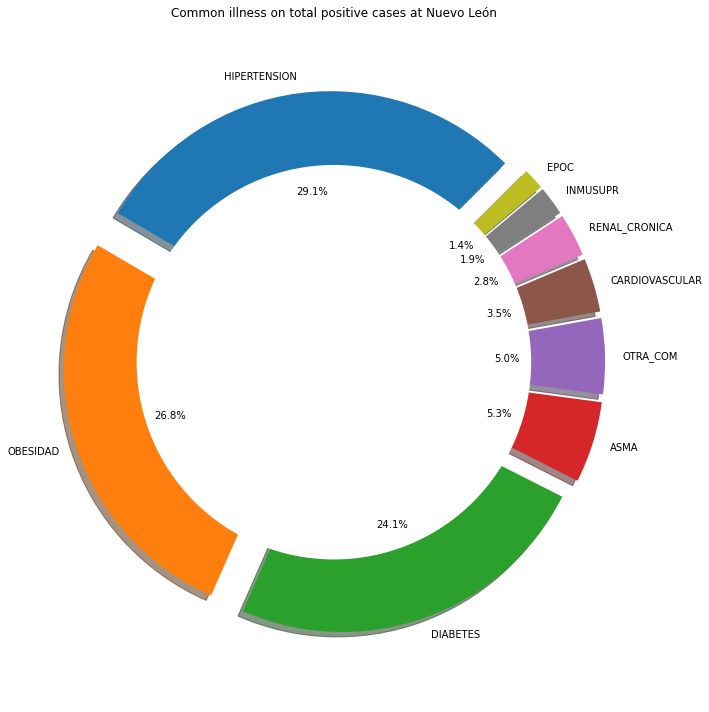

############################################## Oaxaca ##############################################
Most common illness on total positive cases at Oaxaca = OBESIDAD


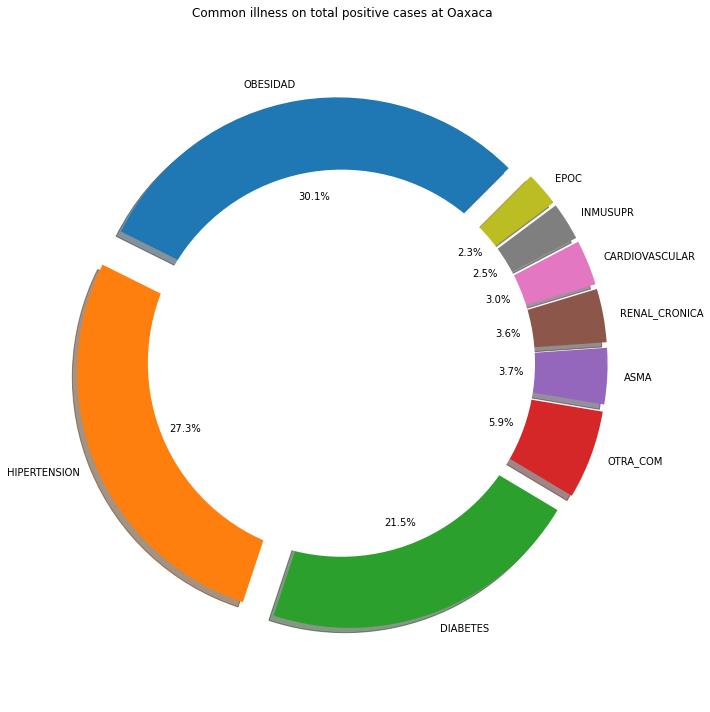

############################################## Puebla ##############################################
Most common illness on total positive cases at Puebla = OBESIDAD


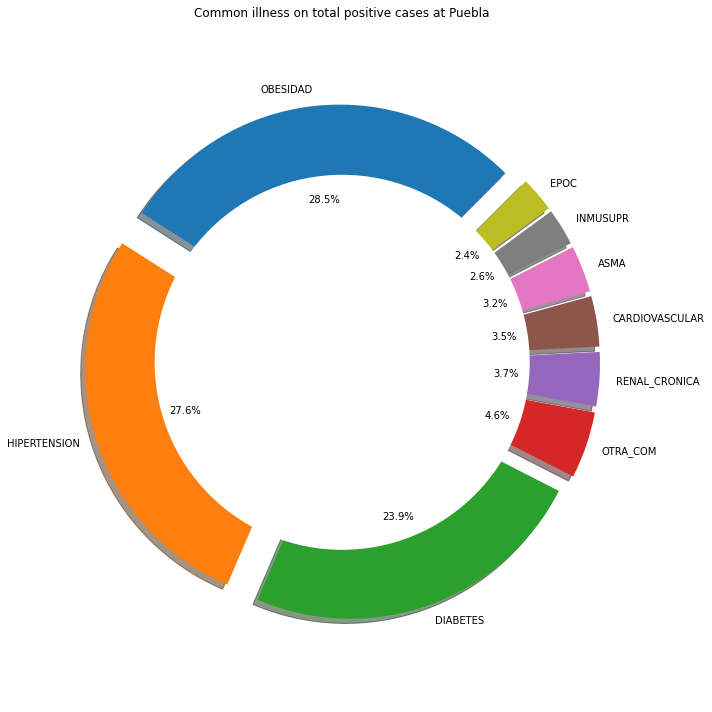

############################################ Querétaro #############################################
Most common illness on total positive cases at Querétaro = HIPERTENSION


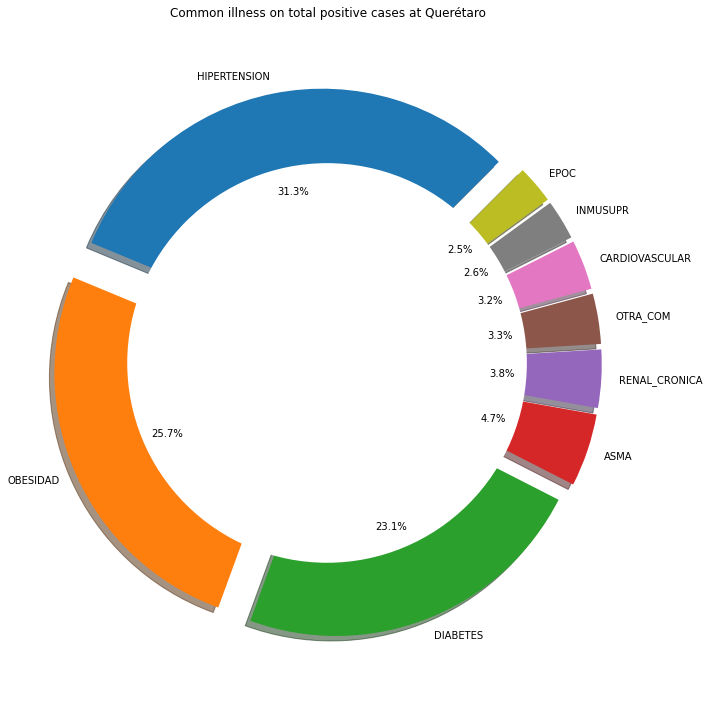

########################################### Quintana Roo ###########################################
Most common illness on total positive cases at Quintana Roo = OBESIDAD


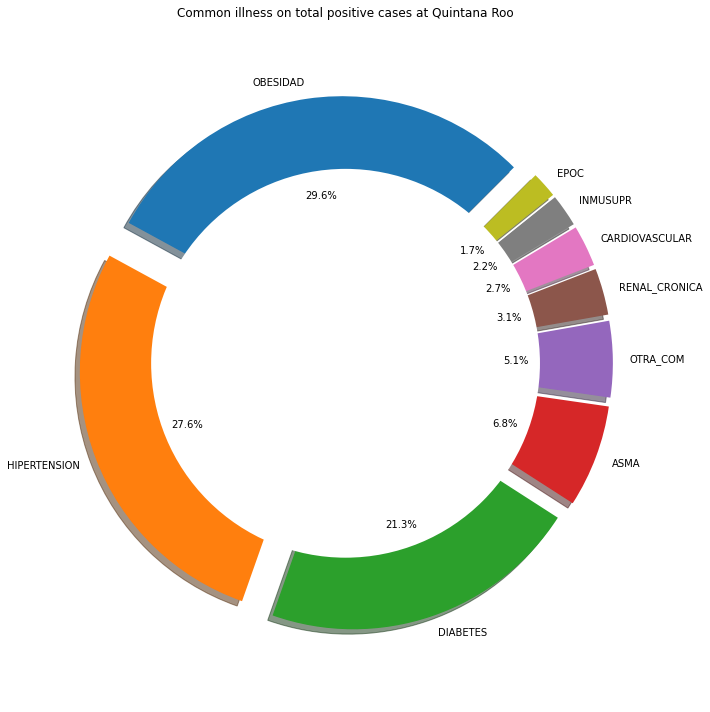

######################################### San Luis Potosí ##########################################
Most common illness on total positive cases at San Luis Potosí = OBESIDAD


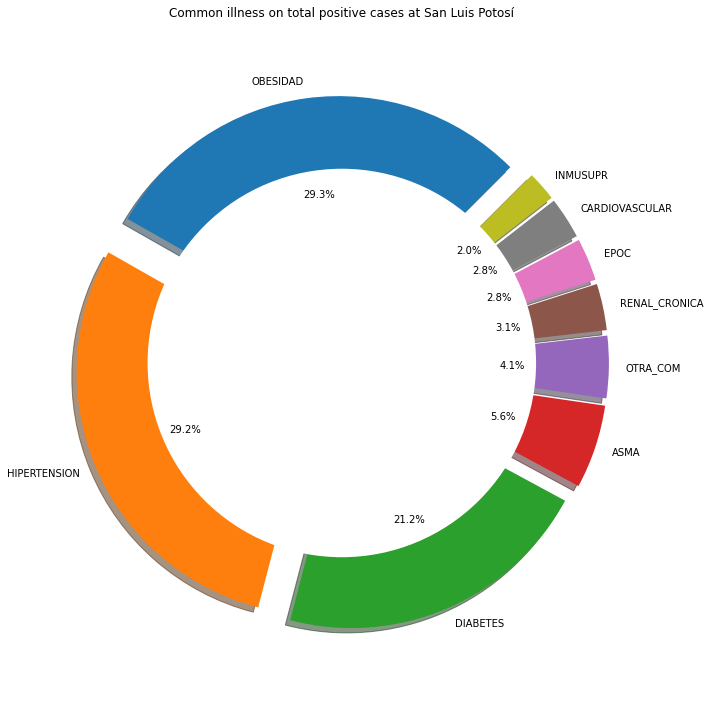

############################################# Sinaloa ##############################################
Most common illness on total positive cases at Sinaloa = HIPERTENSION


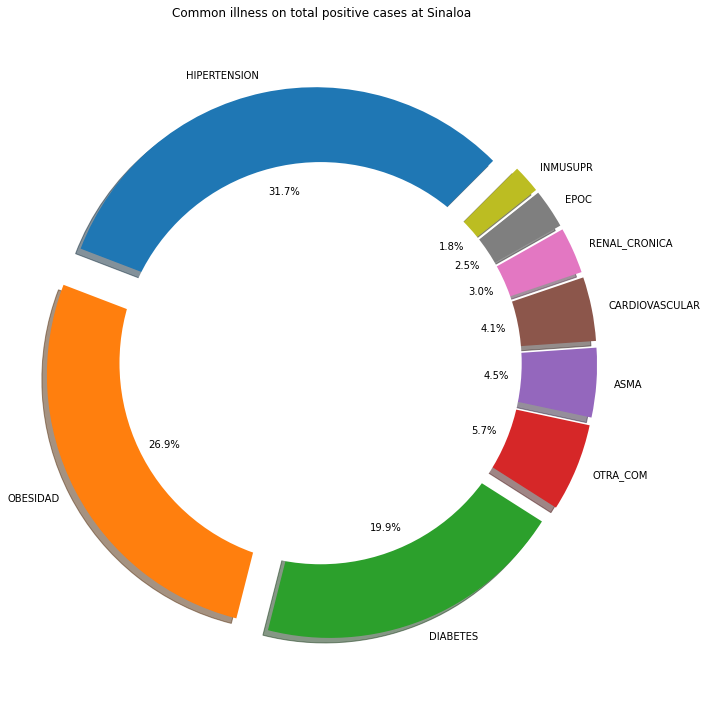

############################################## Sonora ##############################################
Most common illness on total positive cases at Sonora = HIPERTENSION


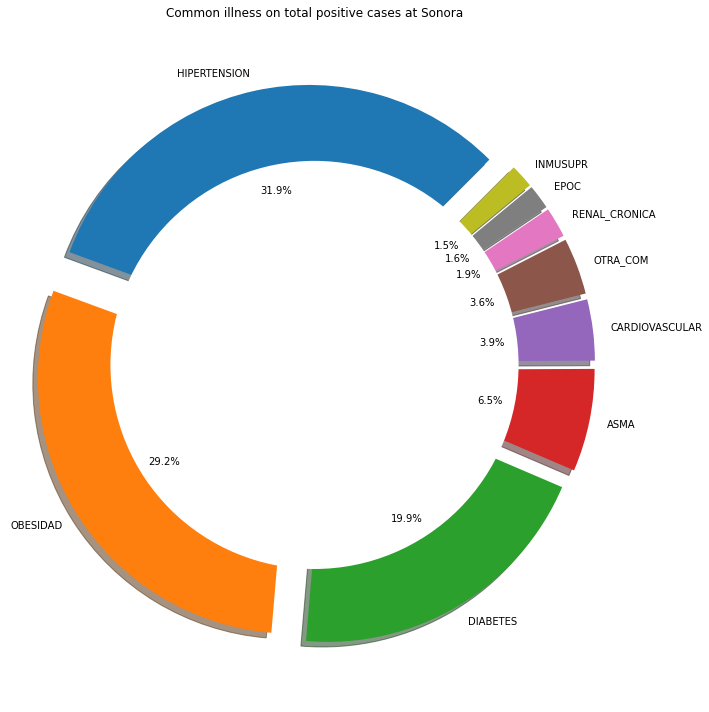

############################################# Tabasco ##############################################
Most common illness on total positive cases at Tabasco = HIPERTENSION


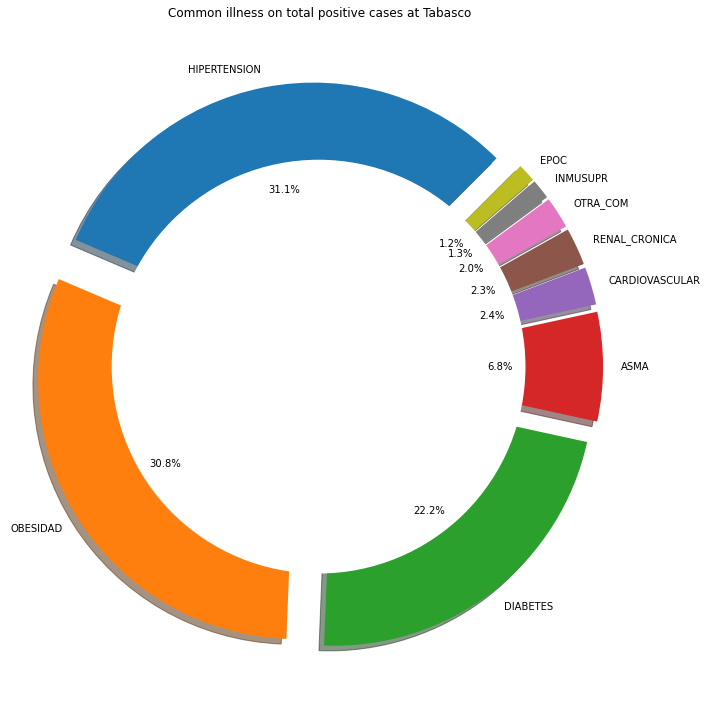

############################################ Tamaulipas ############################################
Most common illness on total positive cases at Tamaulipas = HIPERTENSION


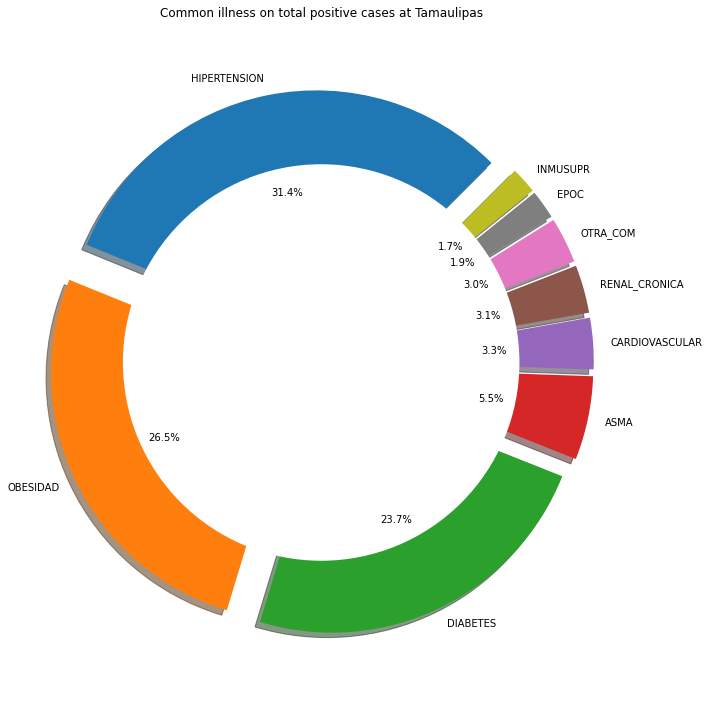

############################################# Tlaxcala #############################################
Most common illness on total positive cases at Tlaxcala = HIPERTENSION


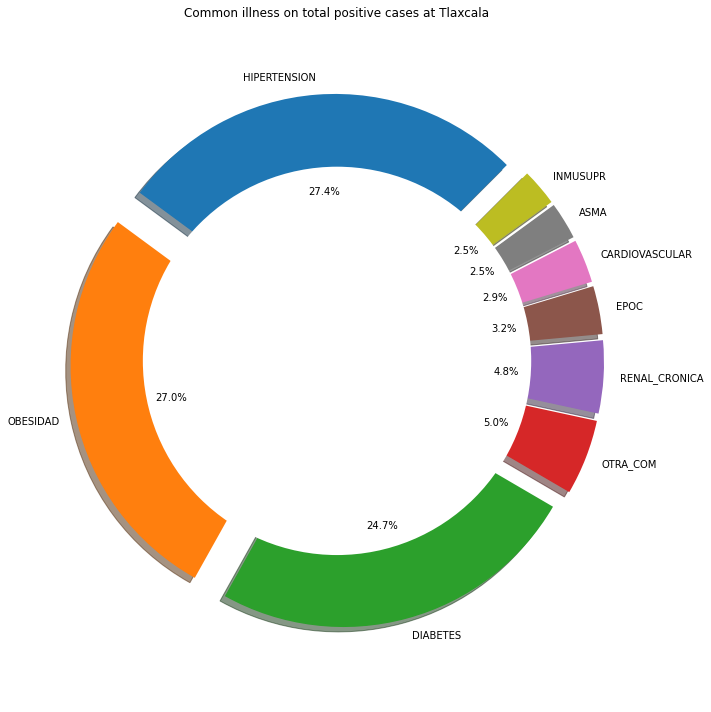

################################# Veracruz De Ignacio De La Llave ##################################
Most common illness on total positive cases at Veracruz De Ignacio De La Llave = HIPERTENSION


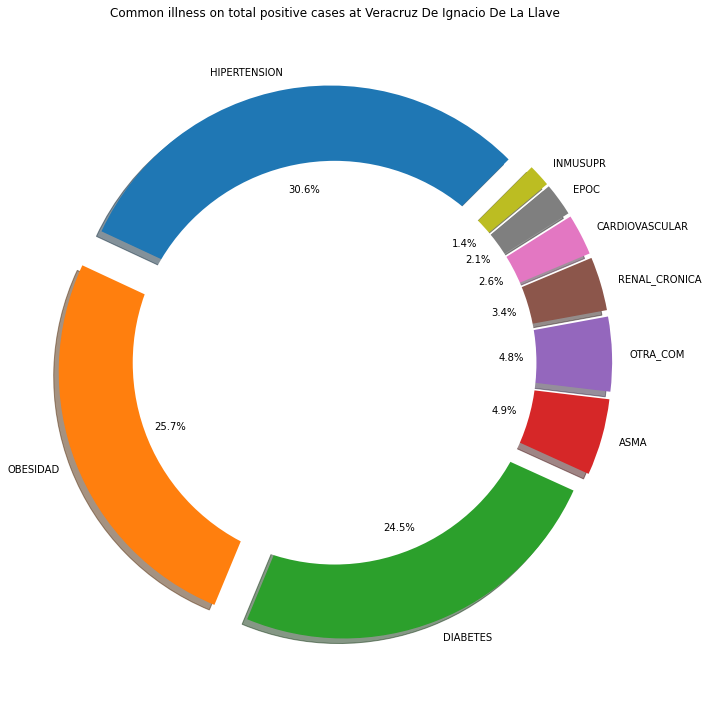

############################################# Yucatán ##############################################
Most common illness on total positive cases at Yucatán = HIPERTENSION


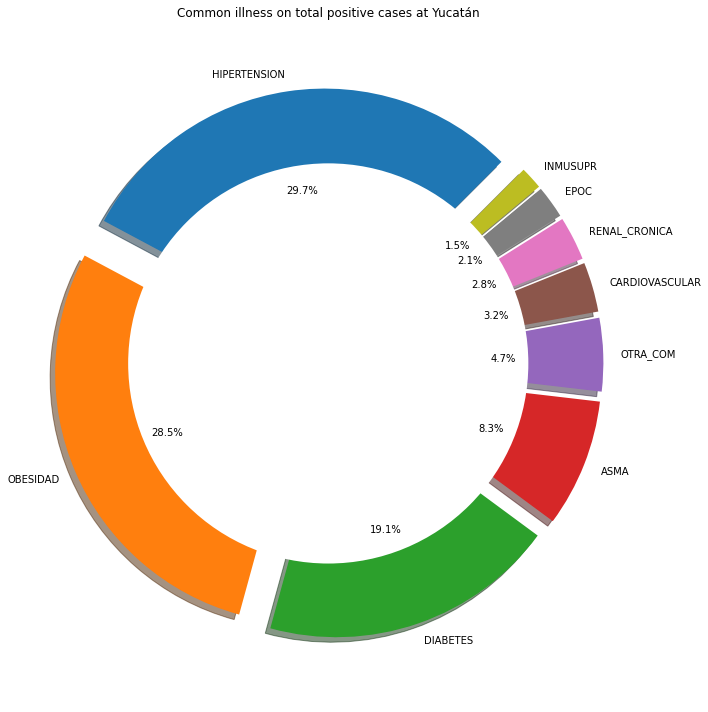

############################################ Zacatecas #############################################
Most common illness on total positive cases at Zacatecas = HIPERTENSION


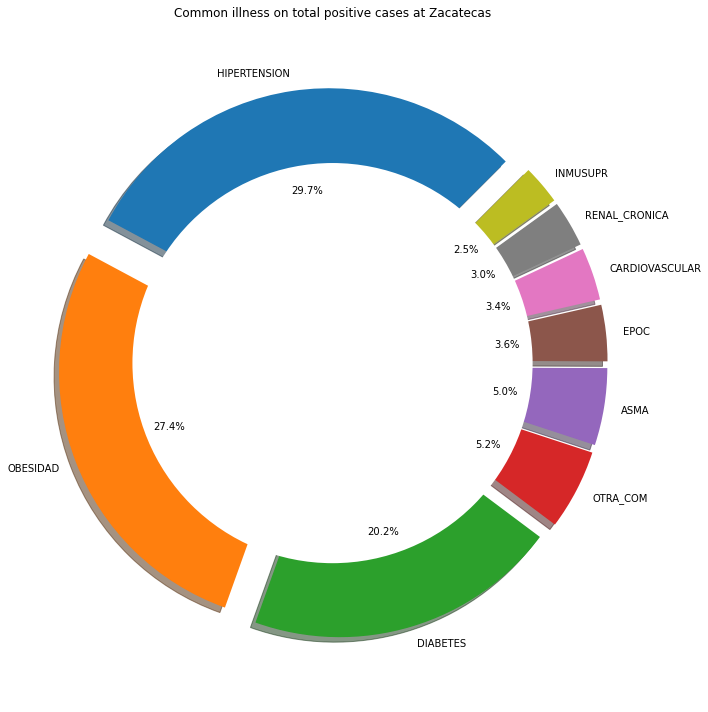

In [18]:
##### Common illness on total positive cases by state

for state in sorted(df_cov.ENTIDAD_RES.unique()):
    print(f' {state} '.center(100,'#'))
    # Data Extraction
    ill_name = ['DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA']
    dict_ill_dec = dict()
    for name in ill_name:
        dict_ill_dec[name] = df_deceased_cases.query(f'{name} == 1 & ENTIDAD_RES == "{state}"').shape[0]
    print(f'Most common illness on total positive cases at {state} = {max(dict_ill_dec, key=dict_ill_dec.get)}')
    # Data Visualization
    graph_pie(dict_ill_dec,f'Common illness on total positive cases at {state}')

# Interactive map

In [19]:
##### Replace the name of the states in the DataFrame with the json -- to avoid missing information

with open("mexico22.json") as f:
    data = json.load(f)
    
states_json = list()
for i in range(32):
    states_json.append(data['features'][i]['properties']['name'])
    
states_json = sorted(states_json)
states_df = sorted(df_cov.ENTIDAD_RES.unique())
print('In json the differences appear as:',sorted(set(states_json) - set(states_df)))
print('While in the DataFrame the differences appear as:',sorted(set(states_df) - set(states_json)))

dict_states = dict()
for json,df in zip(sorted(set(states_json) - set(states_df)),sorted(set(states_df) - set(states_json))):
    dict_states[df] = json
    
df_cov['ENTIDAD_RES'] = df_cov['ENTIDAD_RES'].replace(dict_states)

In json the differences appear as: ['CDMX', 'Estado De Mexico', 'Michoacan De Ocampo', 'Nuevo Leon', 'Queretaro', 'San Luis Potosi', 'Yucatan']
While in the DataFrame the differences appear as: ['Ciudad De México', 'Estado De México', 'Michoacán De Ocampo', 'Nuevo León', 'Querétaro', 'San Luis Potosí', 'Yucatán']


In [20]:
##### Number of confirmed cases and deceased cases on Mexico (dataset)

data = gpd.read_file("mexico22.json").sort_values('name',ascending = True).reset_index(drop = True)
data.rename(columns = {'name': "States"}, inplace=True)
data['Positives'] = df_cov[(df_cov['CLASIFICACION_FINAL'].isin([1,2,3])) & (~(df_cov['ENTIDAD_NAC'].isin([97,98,99])))].groupby('ENTIDAD_RES') \
                    .count()['CLASIFICACION_FINAL'].values
data['Deaths'] = df_cov[(~(df_cov['FECHA_DEF'] =='2001-01-01')) & (~(df_cov['ENTIDAD_NAC'].isin([97,98,99])))].groupby('ENTIDAD_NAC') \
                 .count()['CLASIFICACION_FINAL'].values
data

States  \
0                    Aguascalientes   
1                   Baja California   
2               Baja California Sur   
3                              CDMX   
4                          Campeche   
5                           Chiapas   
6                         Chihuahua   
7              Coahuila De Zaragoza   
8                            Colima   
9                           Durango   
10                 Estado De Mexico   
11                       Guanajuato   
12                         Guerrero   
13                          Hidalgo   
14                          Jalisco   
15              Michoacan De Ocampo   
16                          Morelos   
17                          Nayarit   
18                       Nuevo Leon   
19                           Oaxaca   
20                           Puebla   
21                        Queretaro   
22                     Quintana Roo   
23                  San Luis Potosi   
24                          Sinaloa   
25                           Sonora   
26                          Tabasco   
27                       Tamaulipas   
28                         Tlaxcala   
29  Veracruz De Ignacio De La Llave   
30                          Yucatan   
31                        Zacatecas   

                                             geometry  Positives  Deaths  
0   POLYGON ((-101.84543 22.01747, -101.89173 21.9...      11188    1388  
1   MULTIPOLYGON (((-114.14750 28.00015, -114.2070...      24323    2501  
2   MULTIPOLYGON (((-109.79843 24.15516, -109.8624...      13411     589  
3   POLYGON ((-98.96395 19.08912, -99.01780 19.086...     178221    1084  
4   MULTIPOLYGON (((-91.52440 18.76659, -91.62084 ...       6590    4474  
5   MULTIPOLYGON (((-93.97061 16.00979, -94.11486 ...       7582     701  
6   POLYGON ((-106.50605 31.77026, -106.42895 31.7...      24581    2385  
7   POLYGON ((-99.80696 27.77142, -99.96720 27.640...      37429    3530  
8   MULTIPOLYGON (((-110.92431 18.72736, -110.9794...       6892   21580  
9   POLYGON ((-103.62726 26.64393, -103.32570 26.4...      17399    2086  
10  POLYGON ((-98.65948 19.58552, -98.70909 19.582...     103112    5599  
11  POLYGON ((-99.79062 21.41911, -99.79253 21.291...      53863    4359  
12  POLYGON ((-99.49550 18.67405, -99.50738 18.624...      22887    3567  
13  POLYGON ((-98.00019 20.48449, -98.05248 20.427...      17143    6315  
14  POLYGON ((-102.76049 21.74880, -102.66138 21.7...      37207   16438  
15  POLYGON ((-100.28599 20.21339, -100.23571 20.1...      26606    4346  
16  POLYGON ((-98.96395 19.08912, -98.89326 19.072...       7291    1527  
17  MULTIPOLYGON (((-106.43706 21.49595, -106.3727...       6921    1339  
18  POLYGON ((-99.80696 27.77142, -99.74044 27.722...      59564    4214  
19  POLYGON ((-98.55455 16.31828, -98.51943 16.350...      22864    4315  
20  POLYGON ((-96.72812 18.41025, -96.78951 18.283...      37471    7662  
21  POLYGON ((-99.04338 21.26831, -99.04230 21.175...      17048    1395  
22  MULTIPOLYGON (((-86.74901 20.56769, -86.79711 ...      13729     609  
23  POLYGON ((-100.05727 23.24106, -100.08926 23.1...      31480    3846  
24  MULTIPOLYGON (((-108.88272 25.44318, -108.8188...      22939    5985  
25  MULTIPOLYGON (((-109.23137 26.26342, -109.2254...      40209    3925  
26  POLYGON ((-90.99090 17.80196, -90.99199 17.251...      35521    3715  
27  POLYGON ((-97.13927 25.96583, -97.16747 25.828...      33491    3547  
28  POLYGON ((-98.64087 19.46191, -98.64749 19.513...       8764    1938  
29  POLYGON ((-97.78186 22.27335, -97.77135 22.131...      38218    8794  
30  POLYGON ((-87.53801 21.49942, -87.52509 21.298...      22571    3158  
31  POLYGON ((-100.82844 24.56496, -100.86968 24.4...      13307    2257

In [21]:
##### Number of confirmed cases on Mexico (Map)
# Check the json's path before running it

# Creation of the map
mexico_map = folium.Map(location=[23.634501, -102.552784], zoom_start=5.5, tiles = None)
folium.TileLayer('http://tile.stamen.com/watercolor/{z}/{x}/{y}.png', name = "Watercolor map", control = False, attr = "toner-bcg").add_to(mexico_map)
mexico_geo = r"mexico22.json"

# Adding confirmed cases layer
choropleth = folium.Choropleth(
    name='Confirmed cases',
    geo_data = mexico_geo,
    data = data,
    columns = ['States','Positives'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', 
    fill_opacity = 0.65, 
    line_opacity = 0.5,
    threshold_scale = list(data['Positives'].quantile([0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1])),
    overlay= False)

for key in choropleth._children:
    if key.startswith('color_map'):
        del(choropleth._children[key])
choropleth.add_to(mexico_map)

# Adding deceased cases layer
choropleth = folium.Choropleth(
    name='Deceased cases',
    geo_data = mexico_geo,
    data = data,
    columns = ['States','Deaths'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', 
    fill_opacity = 0.65, 
    line_opacity = 0.5,
    threshold_scale = list(data['Deaths'].quantile([0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1])),
    overlay= False)

for key in choropleth._children:
    if key.startswith('color_map'):
        del(choropleth._children[key])
choropleth.add_to(mexico_map)

# Adding pop-up tooltips
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

data_Geo = gpd.GeoDataFrame(data , geometry = data.geometry)

pop_up = folium.features.GeoJson(
    data_Geo,
    style_function = style_function, 
    control = False,
    highlight_function = highlight_function, 
    tooltip = folium.features.GeoJsonTooltip(
        fields=['States','Positives', 'Deaths'],
        aliases=['State: ','Number of COVID-19 confirmed cases: ', 'Number of COVID-19 deceased cases: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px;")))
mexico_map.add_child(pop_up)
mexico_map.keep_in_front(pop_up)

# To control the layers
folium.LayerControl(collapsed=False).add_to(mexico_map)

mexico_map